
<Html>
    <body>
        <h1>Stock Market Prediction</h1>
        <h2>Stock Market Data From Yahoo Finance</h2><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surety about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [4]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
#globals()['NFLX'] = DataReader('NFLX','yahoo',start,end)
NFLX = pd.read_csv('NFLX.csv')

In [5]:
NFLX.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200

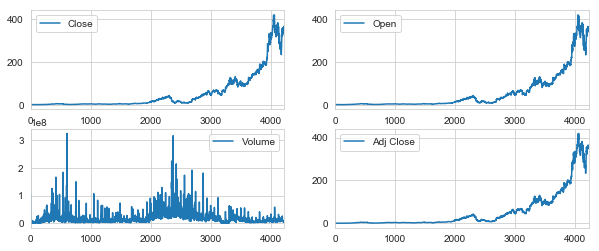

In [6]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
NFLX['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
NFLX['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
NFLX['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
NFLX['Adj Close'].plot(legend=True, figsize=(10,4))

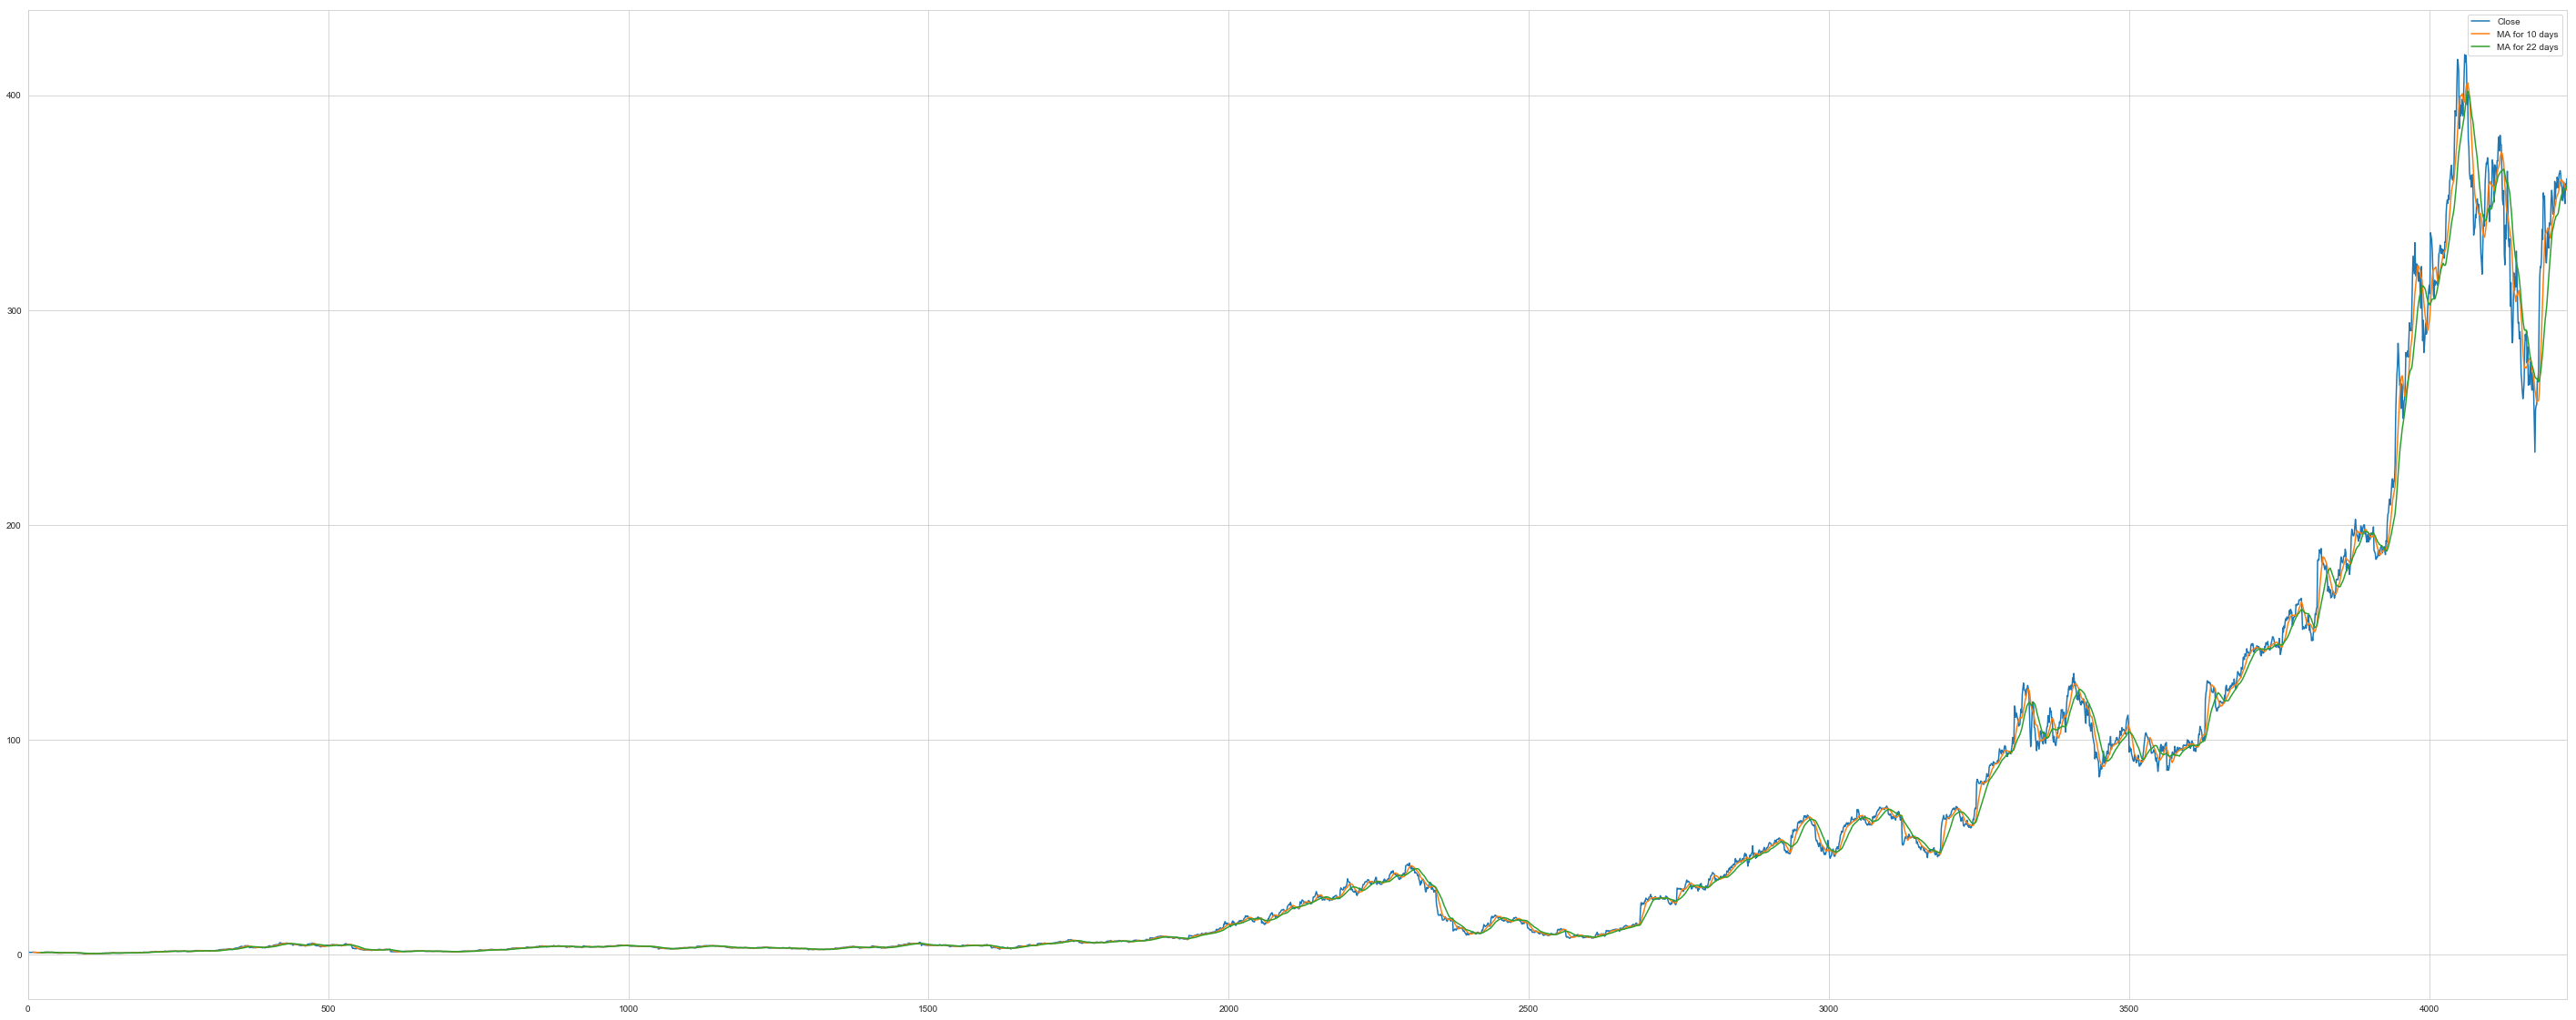

In [7]:
#1 Moving Average(MA)
MA_day = [10,22]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    NFLX[column_name] = NFLX['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
NFLX[['Close','MA for 10 days','MA for 22 days']].plot(subplots=False,figsize=(50,20))

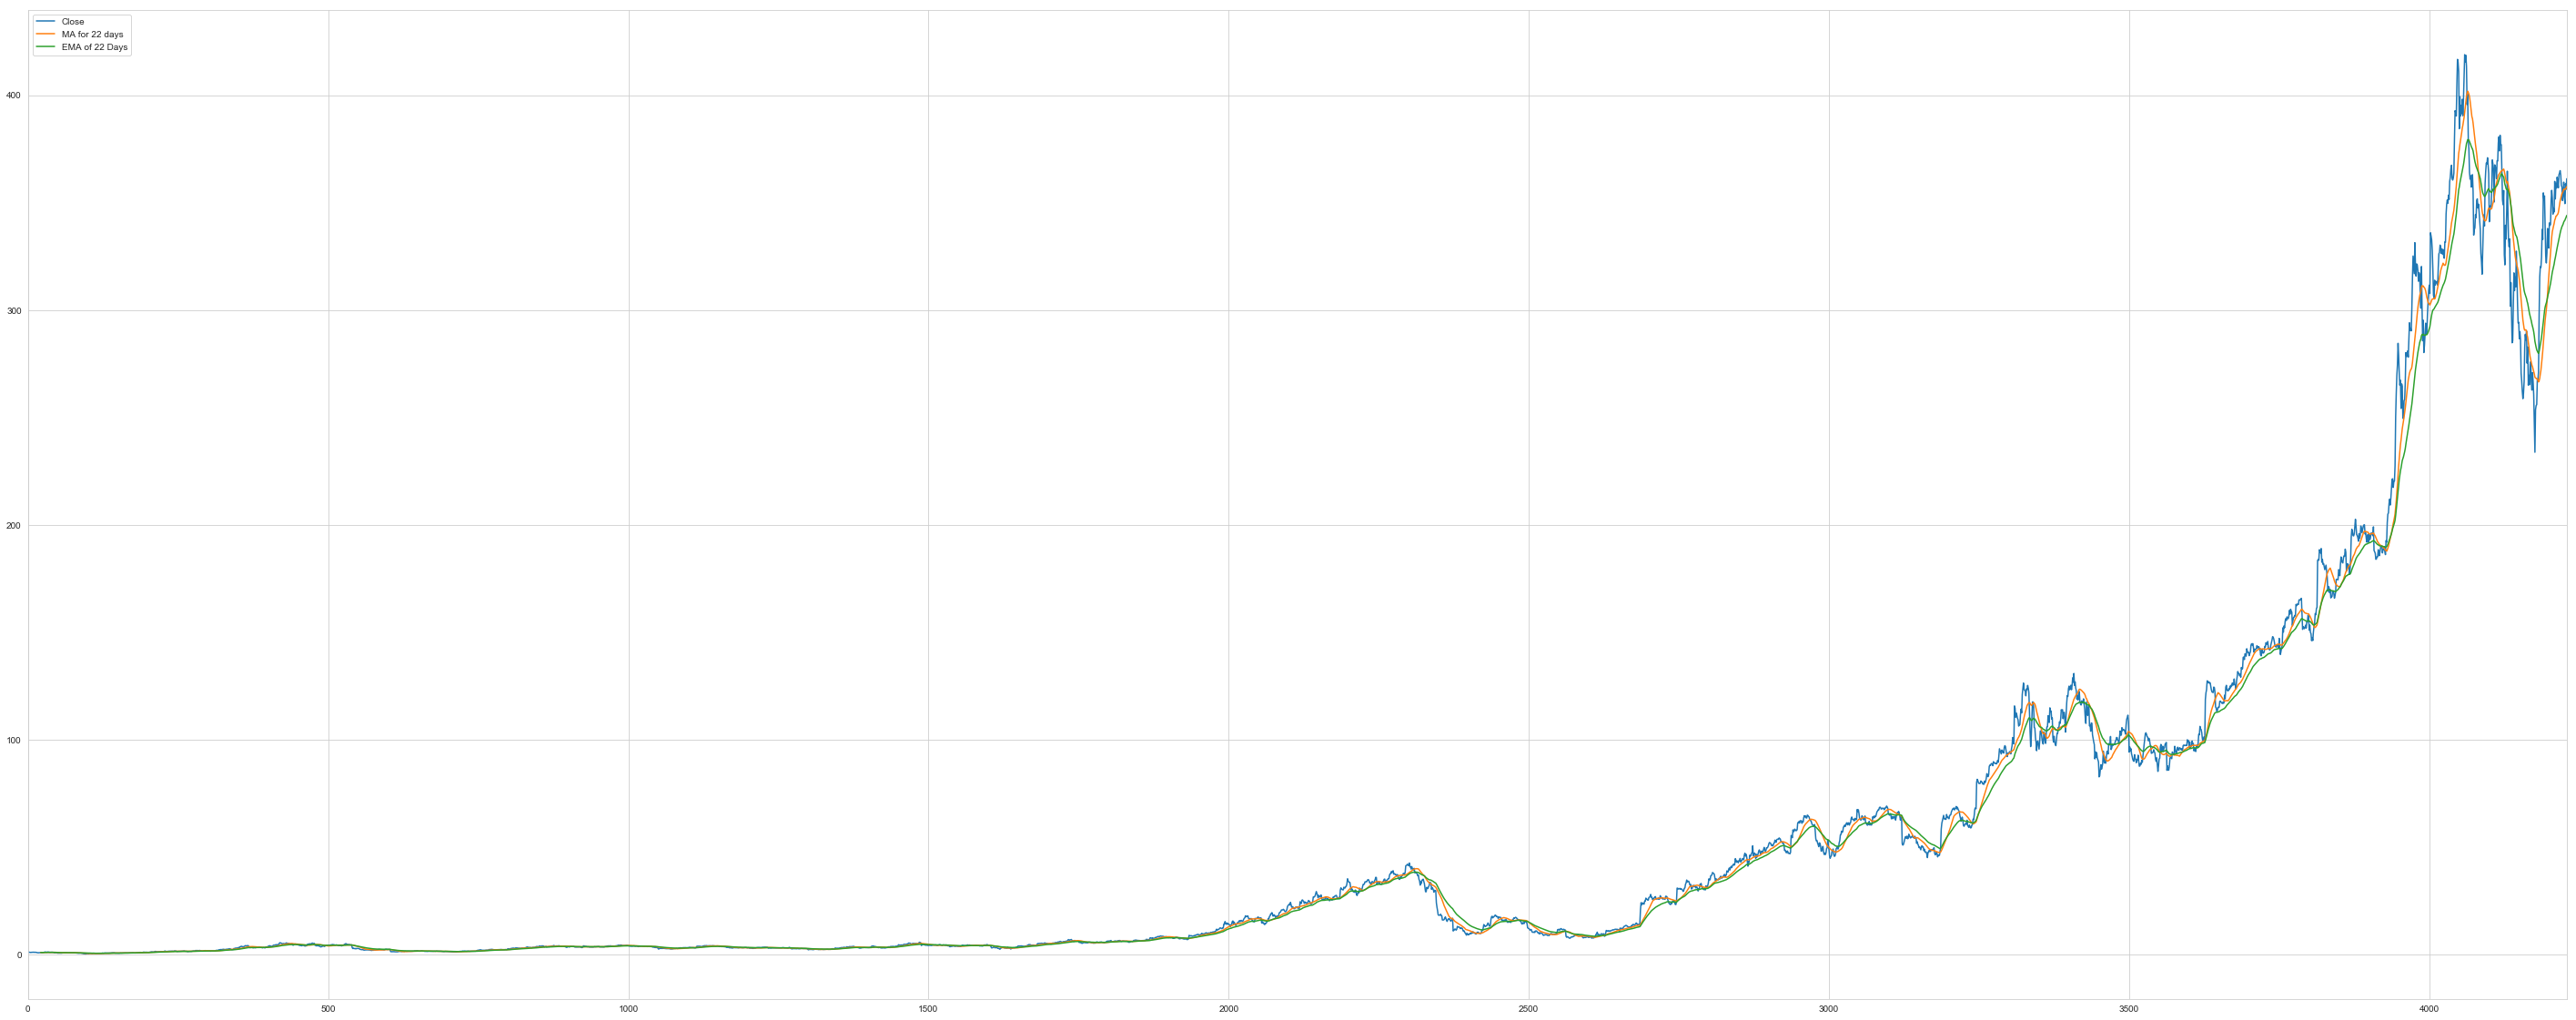

In [8]:
#2 Exponential Moving Average (EMA)
emaPeriod = 22
NFLX['EMA of 22 Days'] = NFLX['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','MA for 22 days','EMA of 22 Days']].plot(subplots=False,figsize=(50,20))

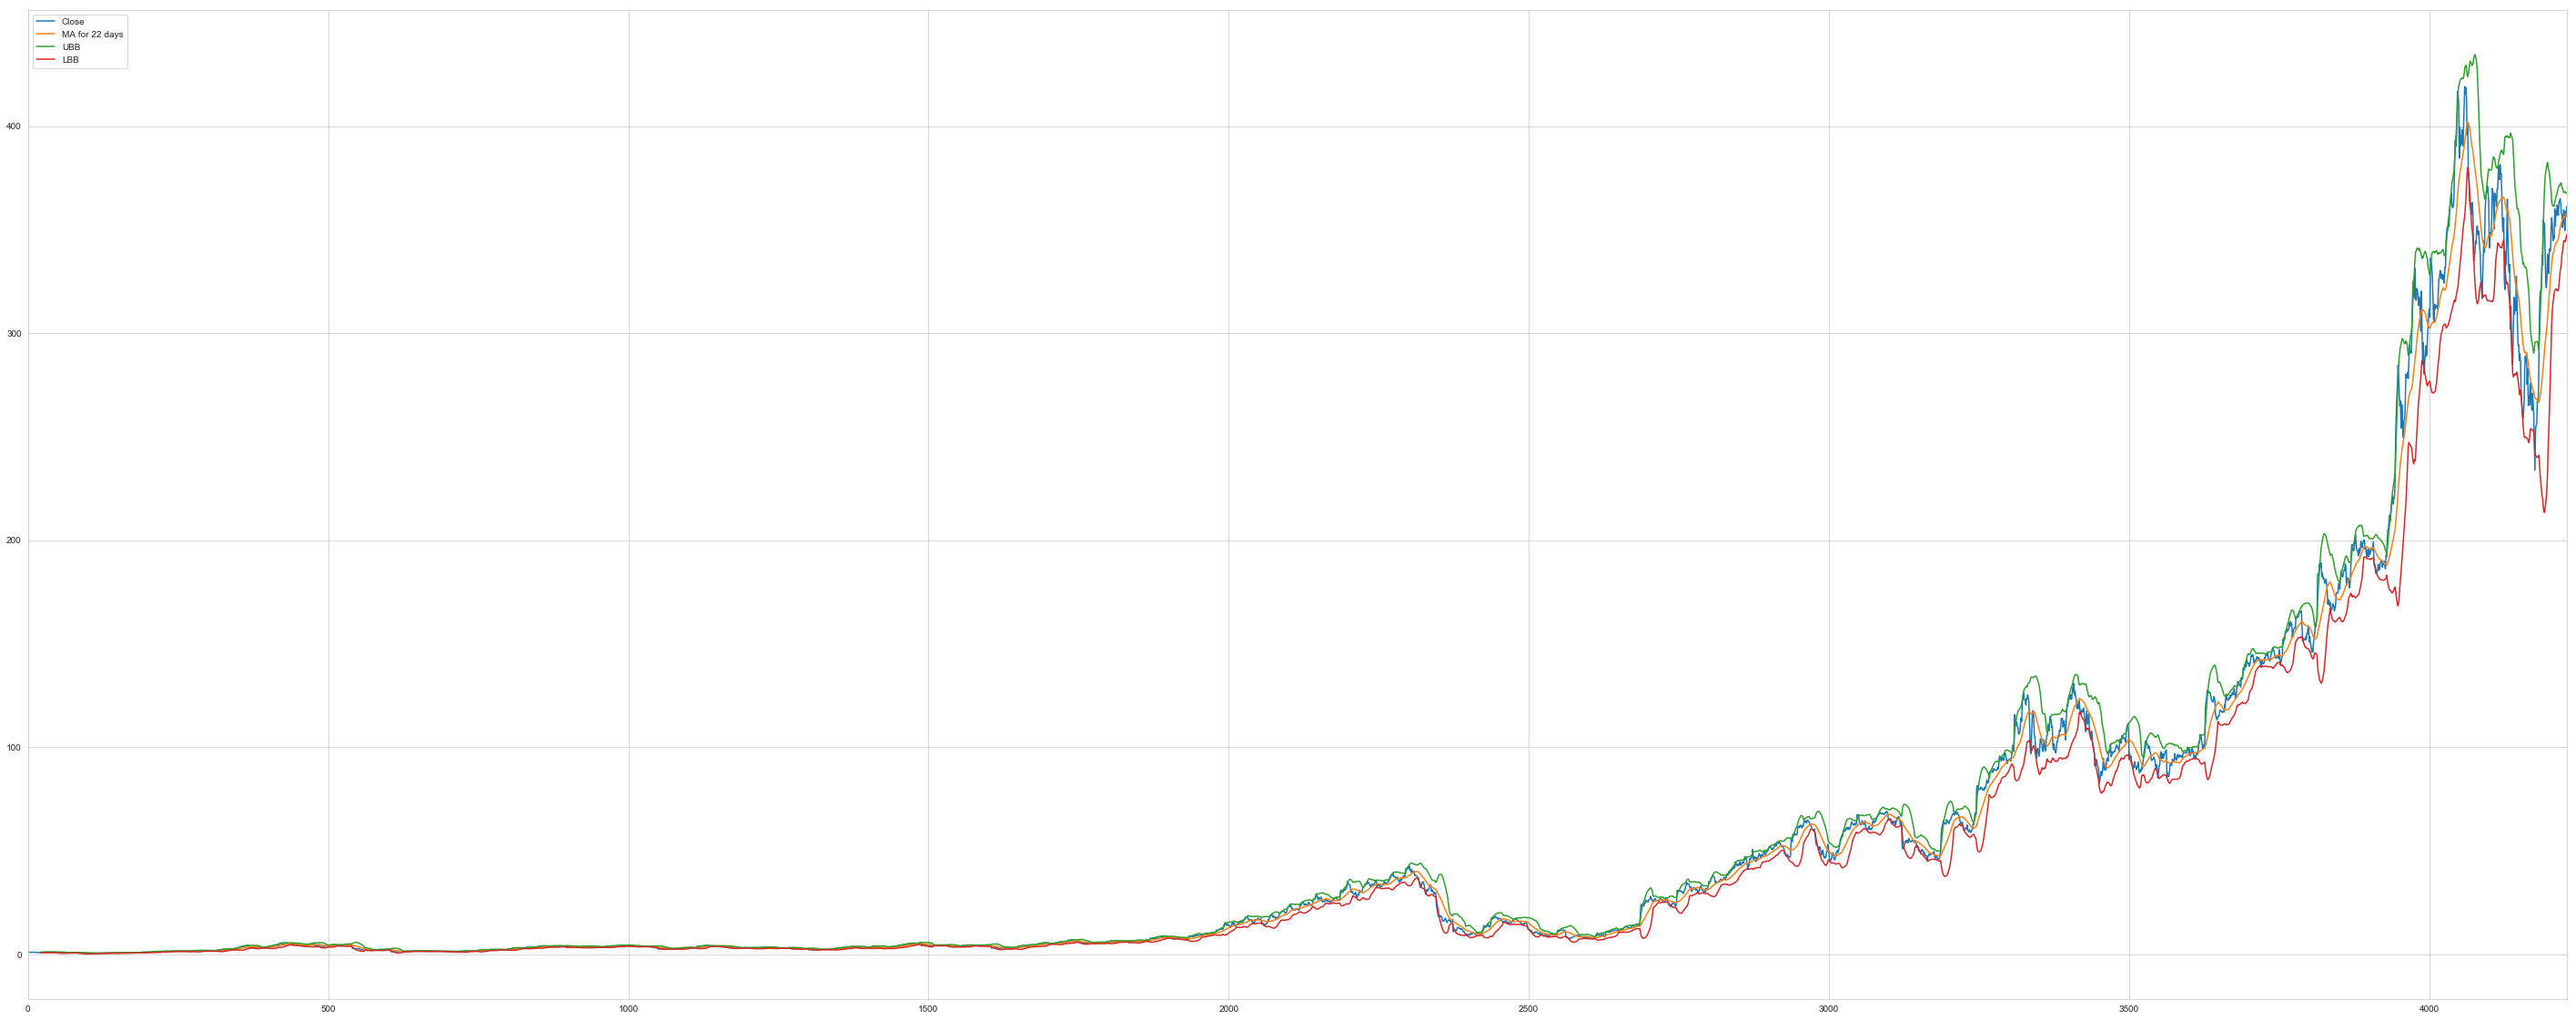

In [9]:
#3 Bollinger Bands (BB)
SD = NFLX['Close'].rolling(22).std()
NFLX['UBB'] = NFLX['MA for 22 days'] + (2*SD)
NFLX['LBB'] = NFLX['MA for 22 days'] - (2*SD)
NFLX[['Close','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

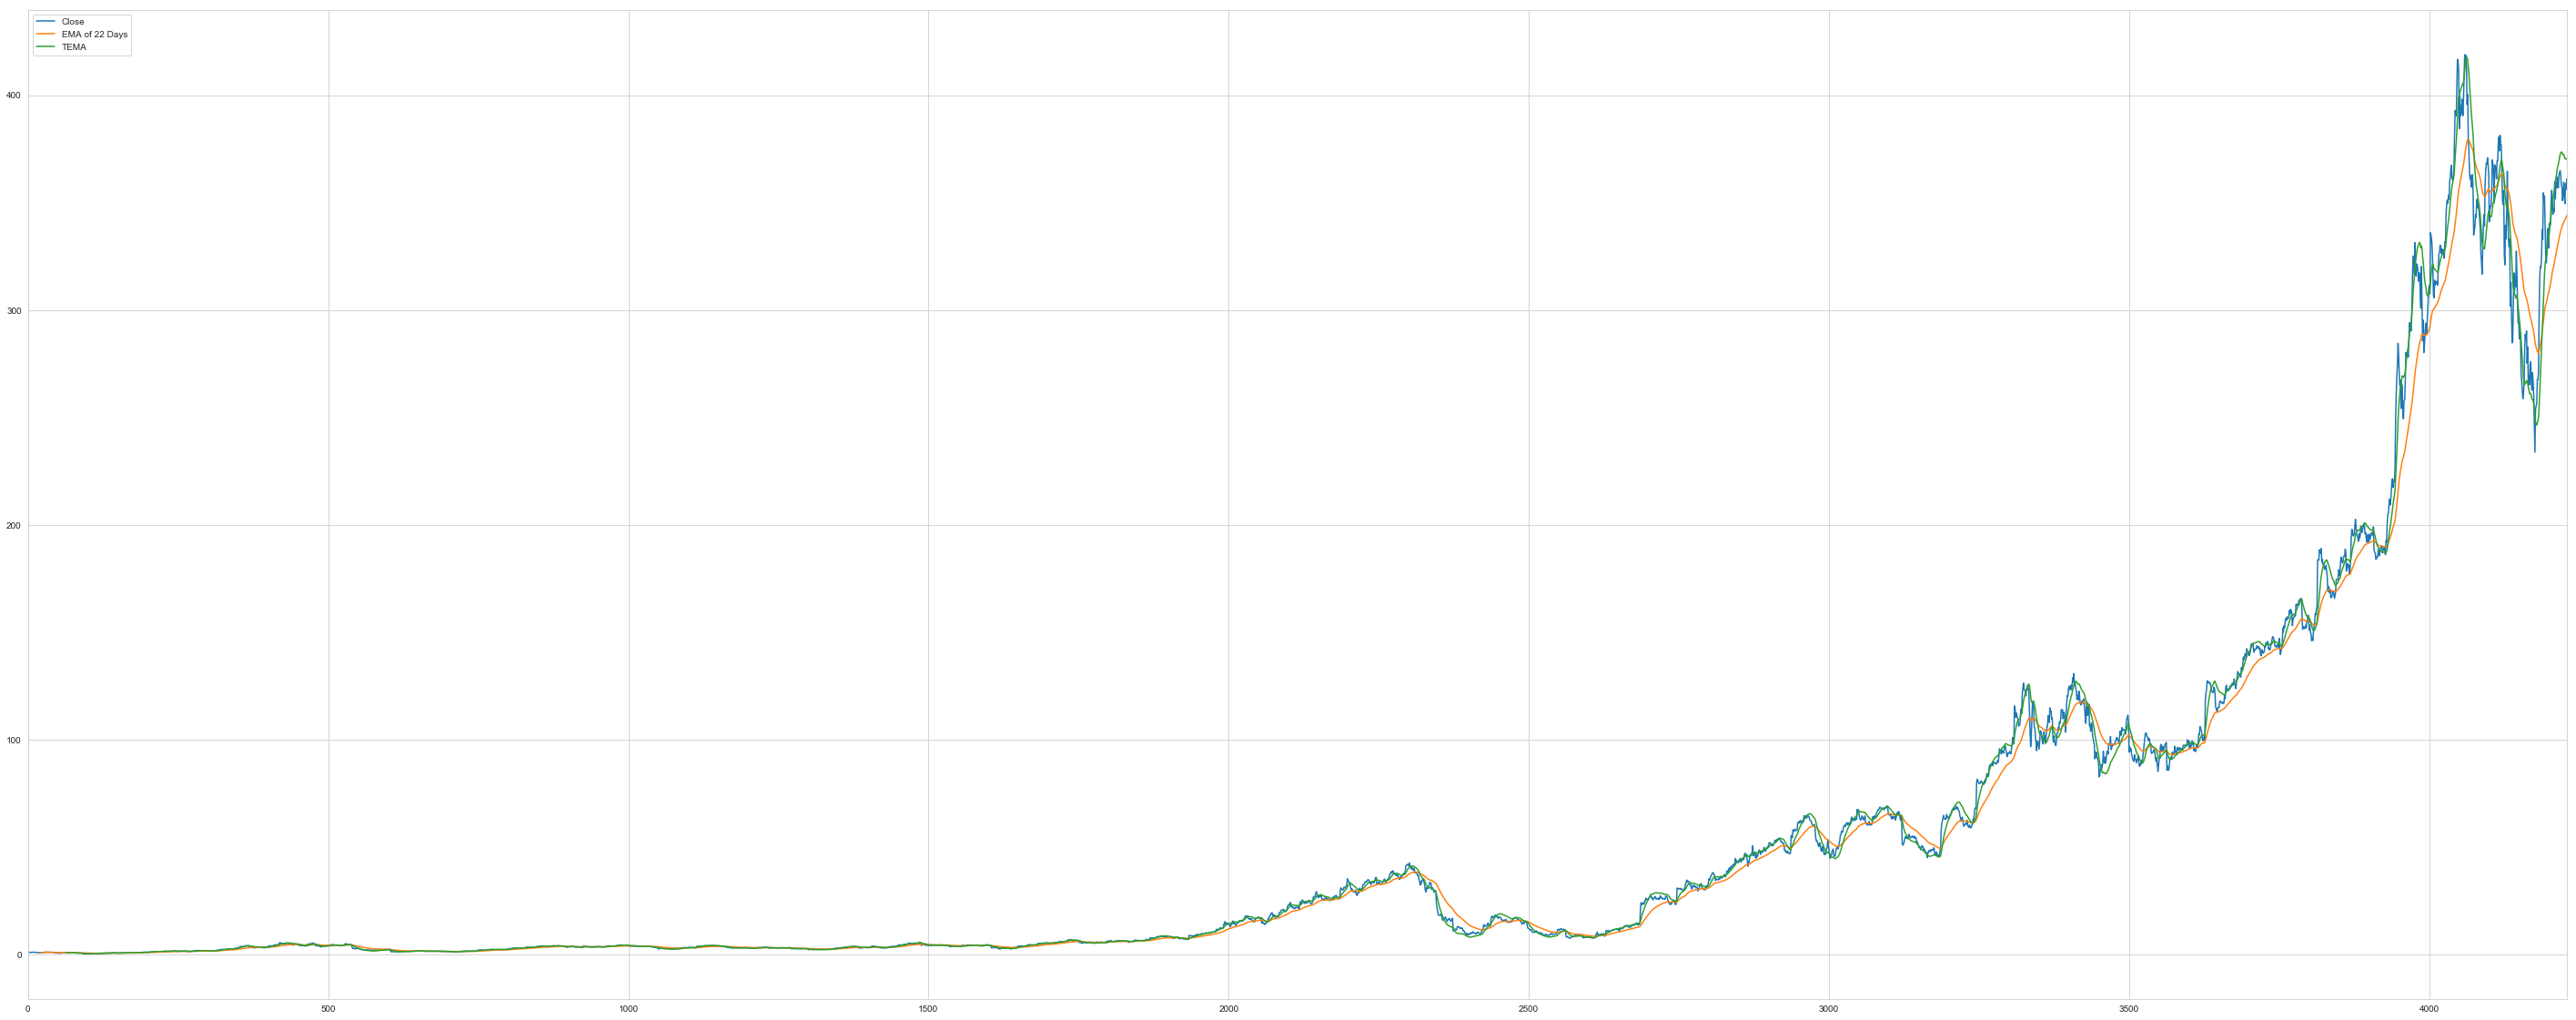

In [10]:
#4 Triple Exponential Moving Average (TEMA)
NFLX['EMA2'] = NFLX['EMA of 22 Days'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['EMA3'] = NFLX['EMA2'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['TEMA'] = 3*NFLX['EMA of 22 Days'] - 3*NFLX['EMA2'] + NFLX['EMA3']
NFLX[['Close','EMA of 22 Days','TEMA']].plot(subplots=False,figsize=(50,20))

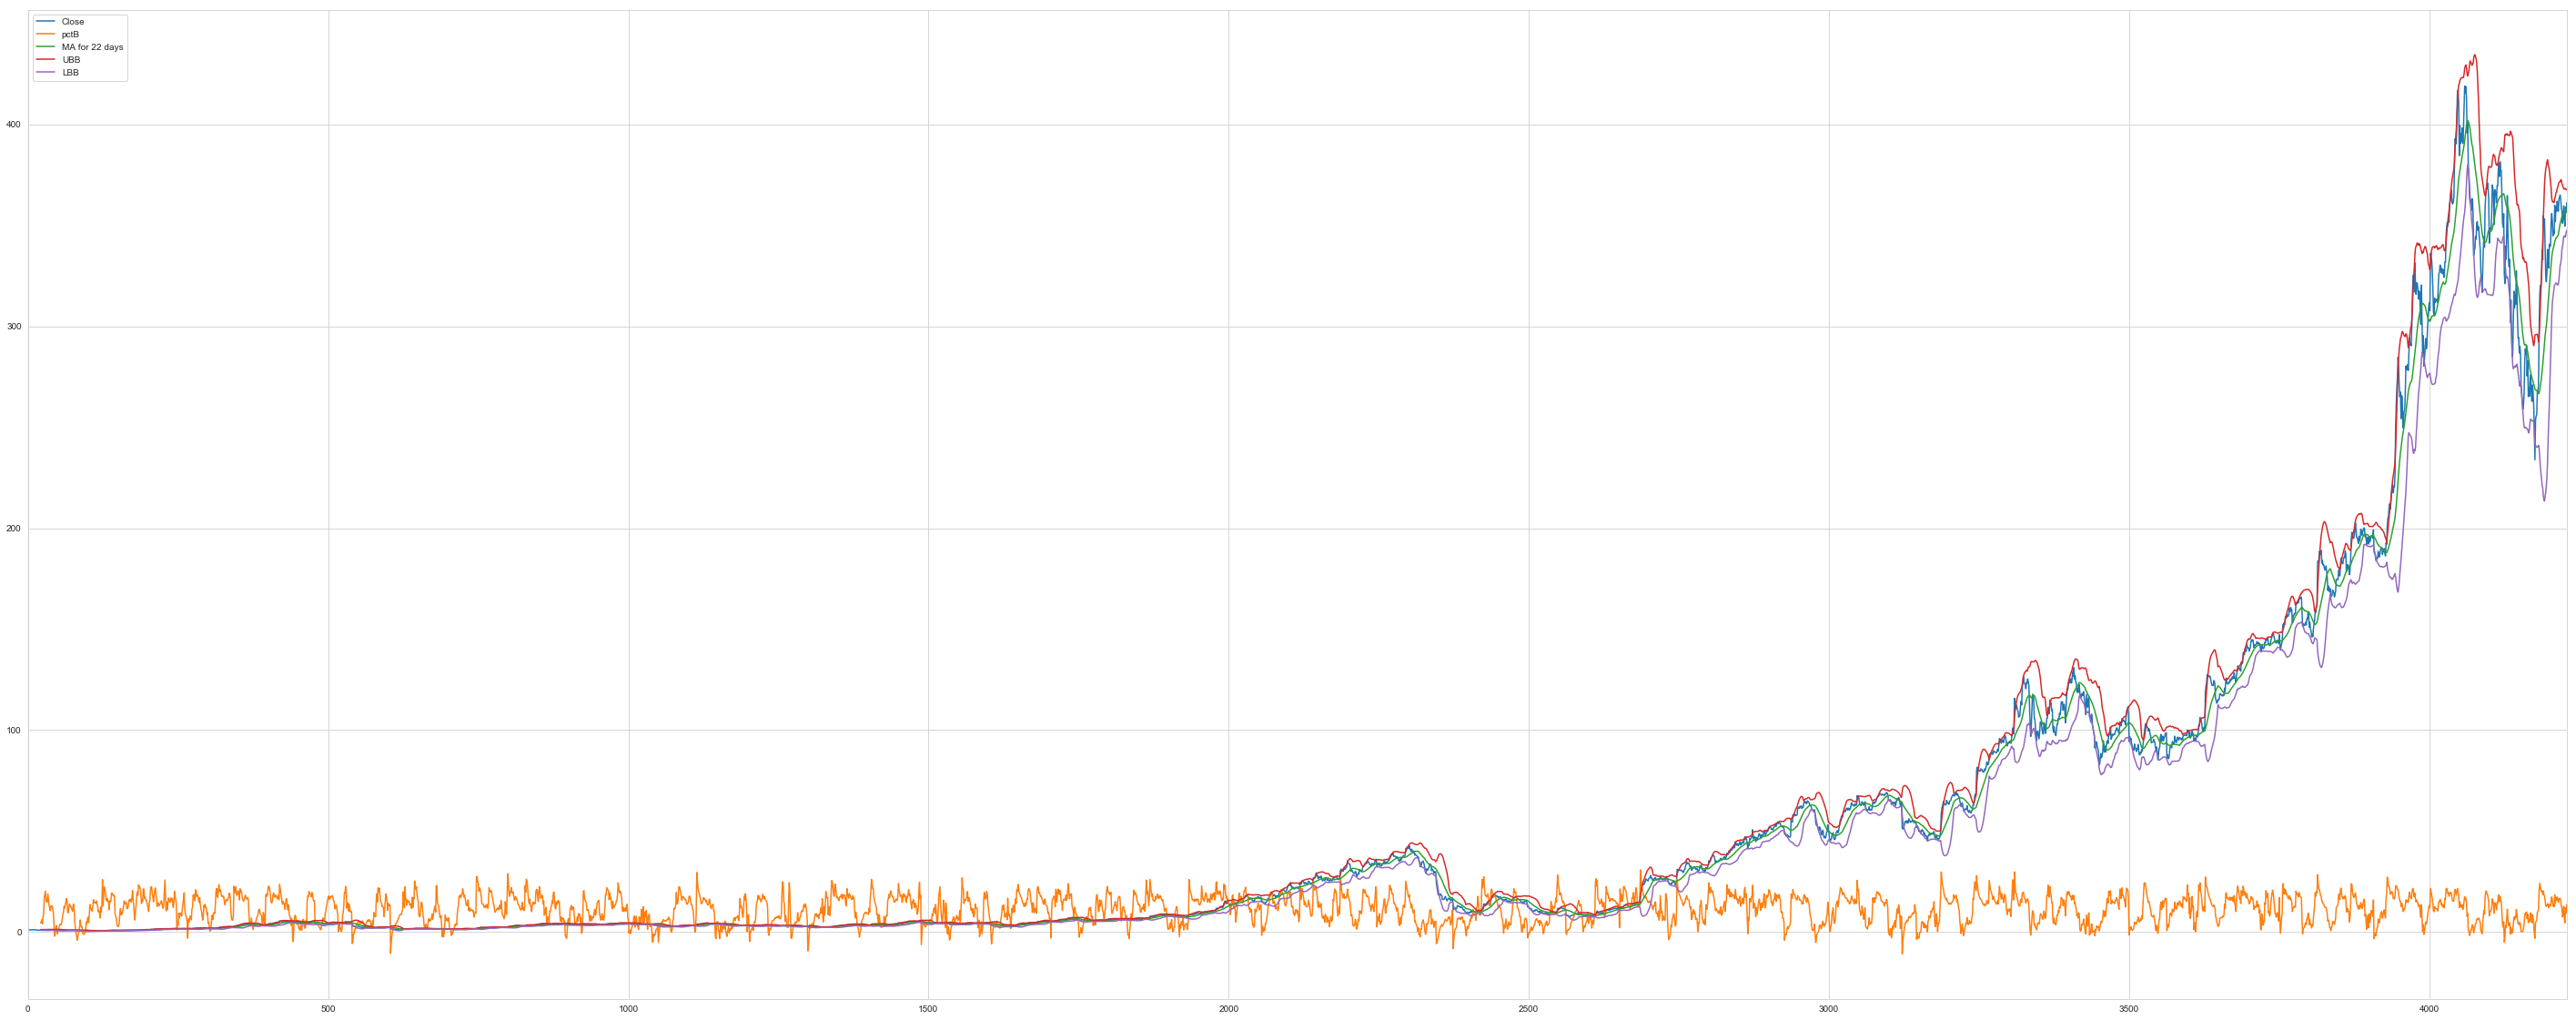

In [11]:
#5 %b
NFLX['pctB'] = 20 * (NFLX['Close'] - NFLX['LBB']) / (NFLX['UBB'] - NFLX['LBB'])
NFLX[['Close','pctB','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

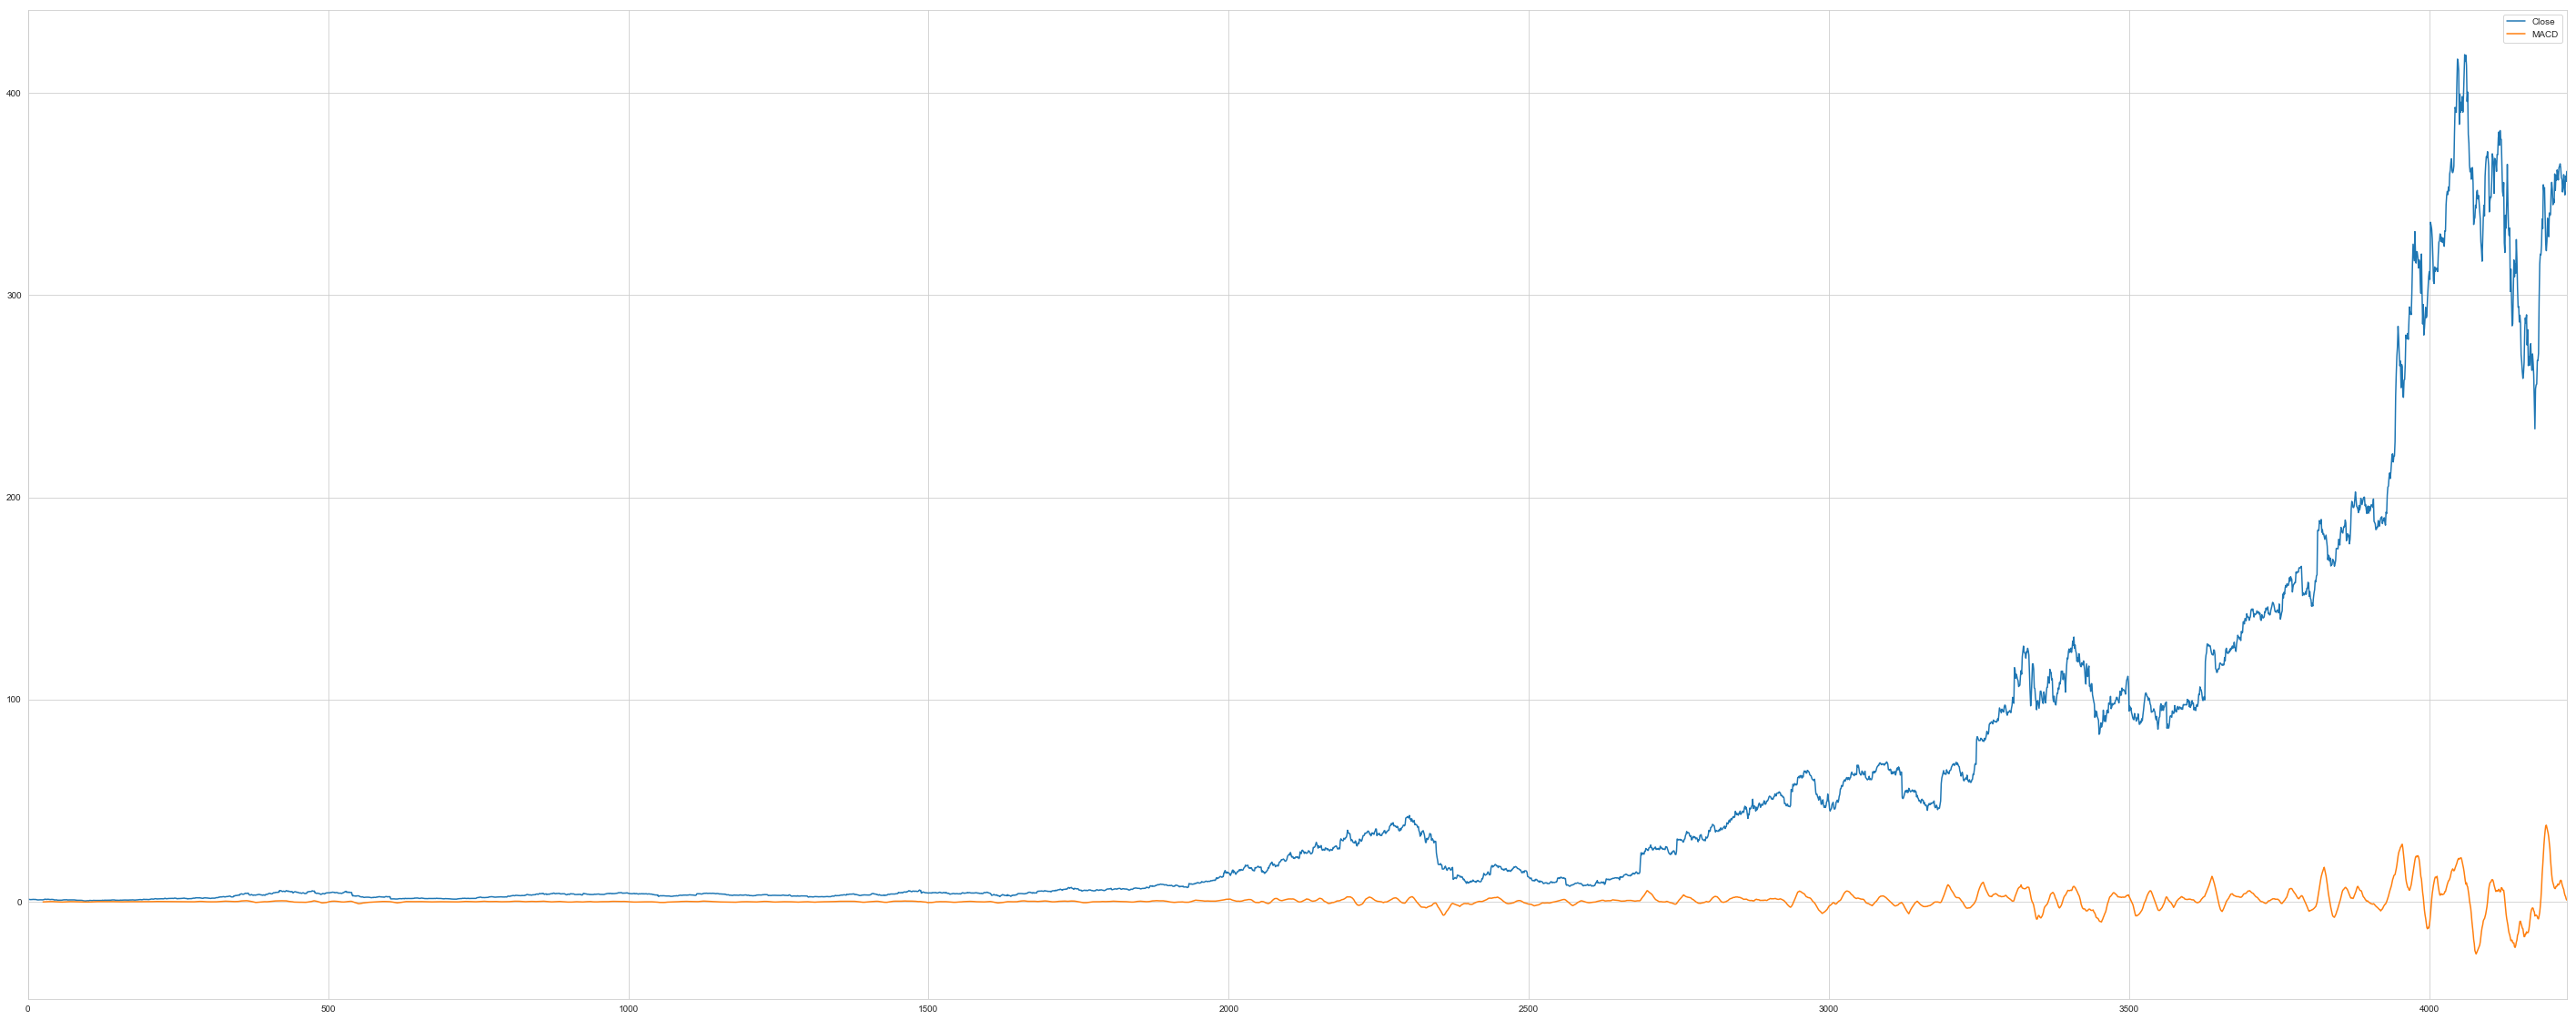

In [12]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = NFLX['Close'].rolling(12).mean()
MA26 = NFLX['Close'].rolling(26).mean()
MACD = MA12 - MA26
NFLX['MACD'] = MACD
NFLX[['Close','MACD']].plot(subplots=False,figsize=(50,20))

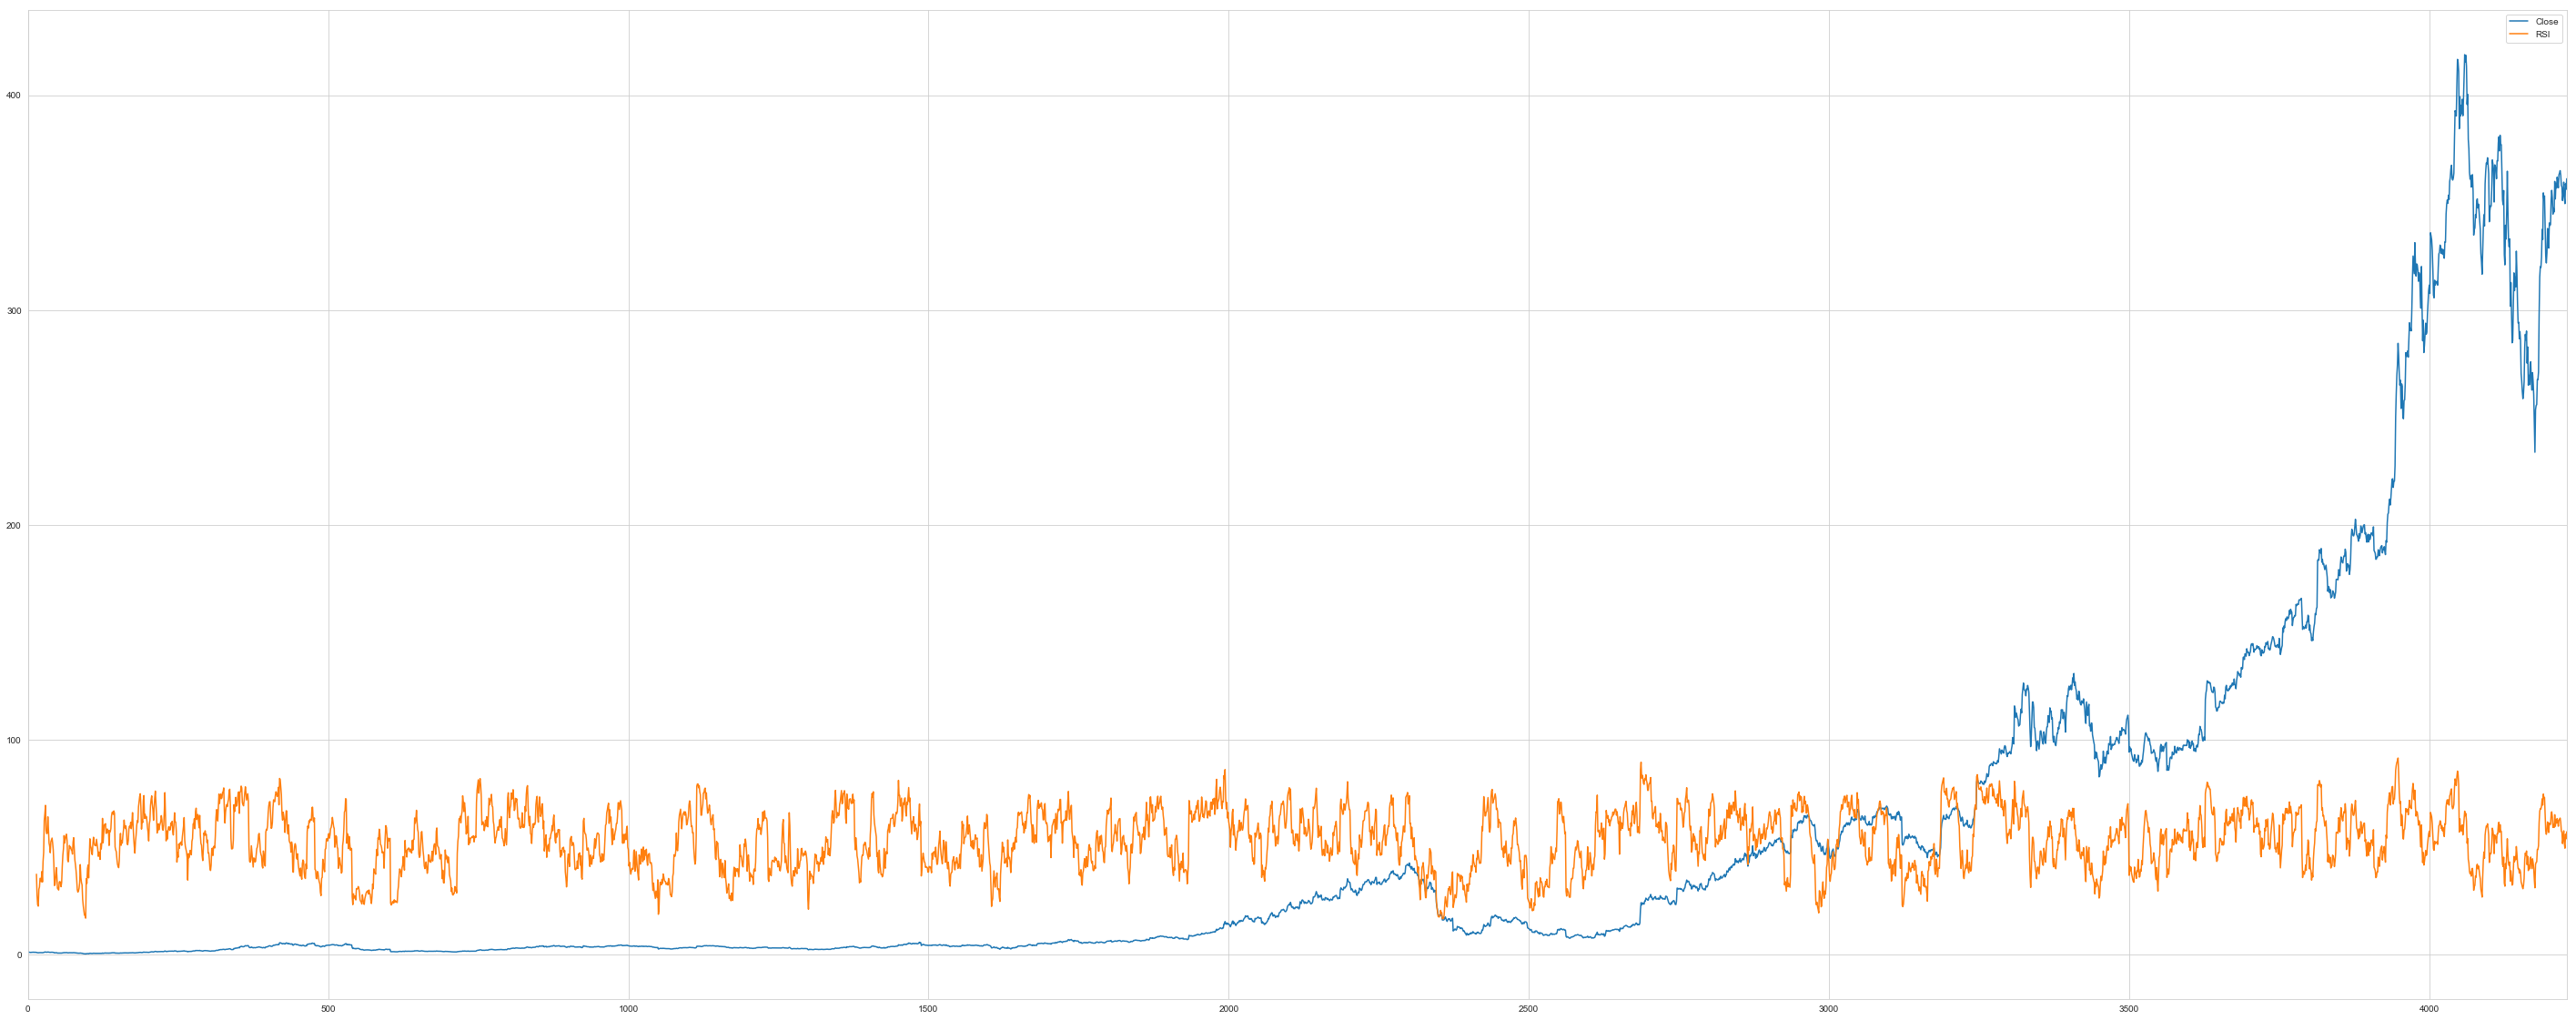

In [13]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = NFLX['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
NFLX['RSI'] = rsi
NFLX[['Close','RSI']].plot(subplots=False,figsize=(50,20))

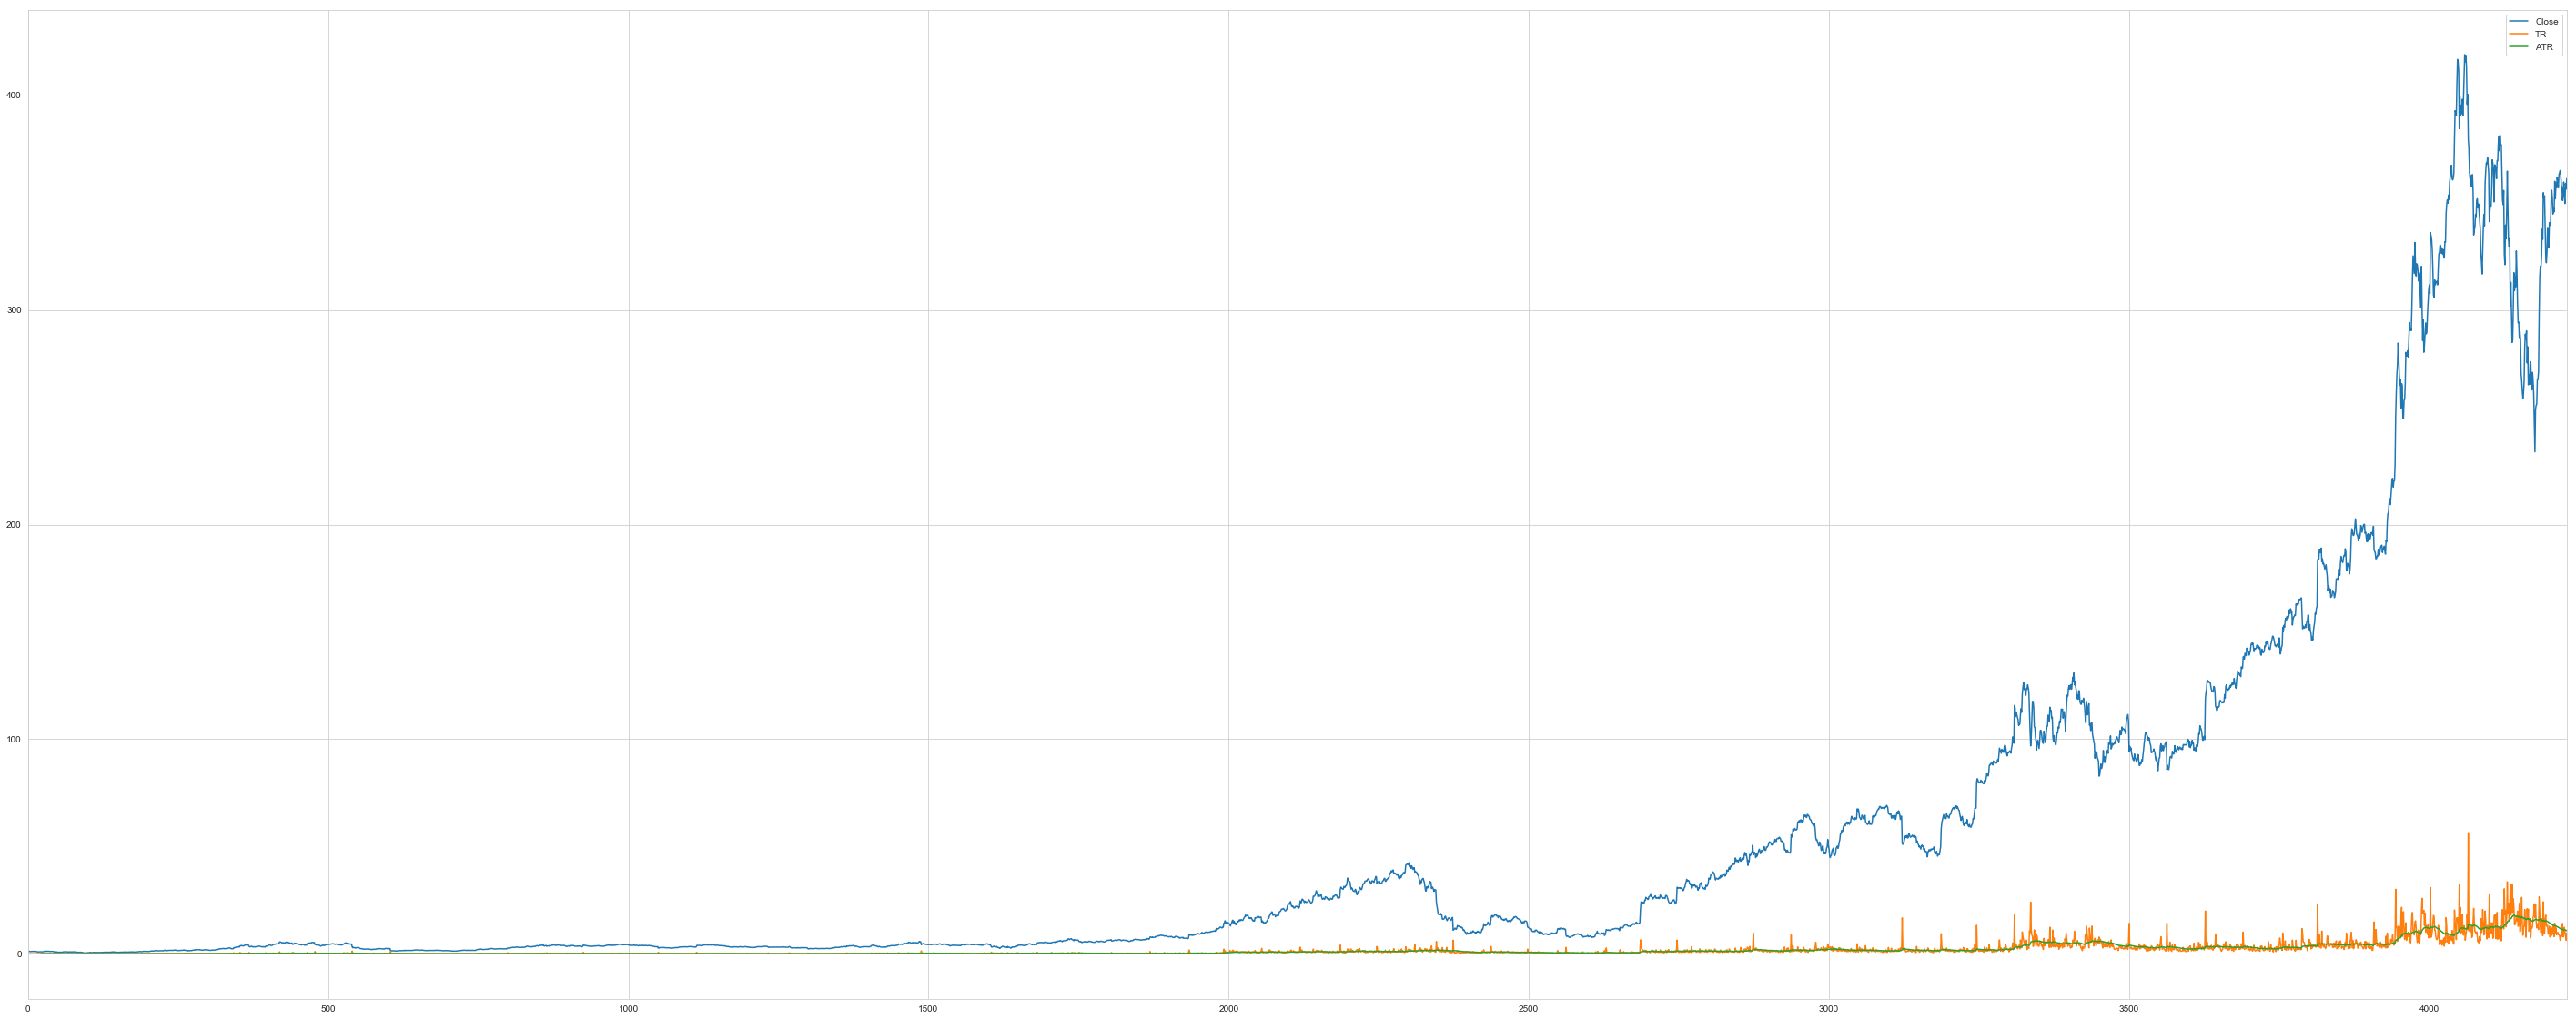

In [14]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(NFLX['Close']):
    TR = TRange(NFLX['High'][x],NFLX['Low'][x],NFLX['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
NFLX['TR'] = TrueRange
NFLX['ATR'] = NFLX['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))

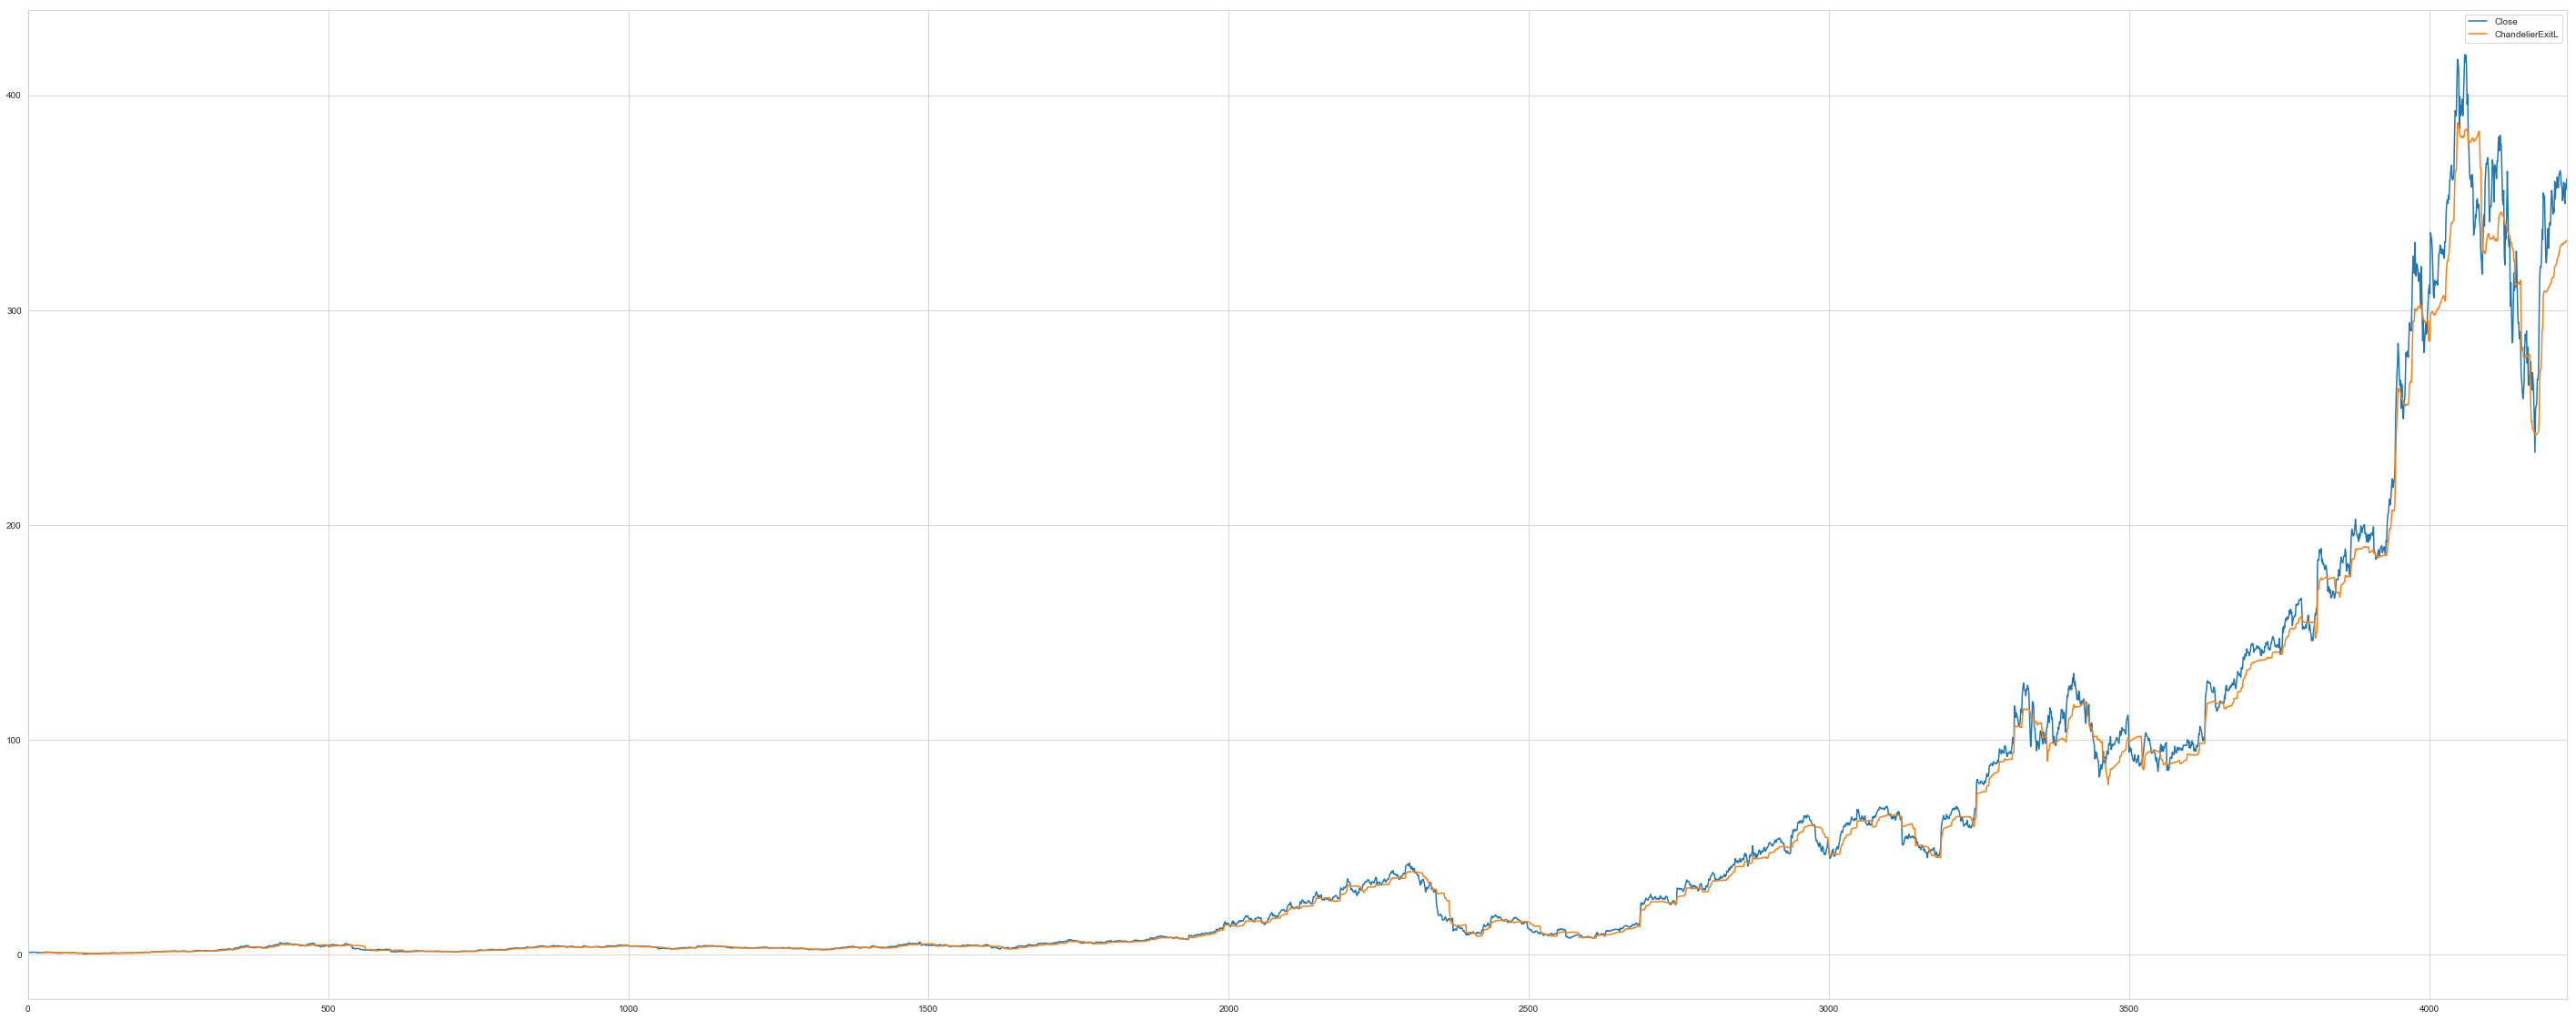

In [15]:
#9  Chandelier Exit 
def Highest(n,emaPeriod):
    max=NFLX['Close'][n]
    for i in range(n,n+emaPeriod+1):
        if NFLX['Close'][i] > max:
            max = NFLX['Close'][i]
    return max
fac =3
ChandelierExitL=np.array([])
ChandelierExitL = np.append(ChandelierExitL, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    ChandelierExit = Highest(i,emaPeriod) - fac*NFLX['ATR'][i+emaPeriod]
    ChandelierExitL = np.append(ChandelierExitL,ChandelierExit)
NFLX['ChandelierExitL']=ChandelierExitL
NFLX[['Close','ChandelierExitL']].plot(subplots=False,figsize=(50,20))

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


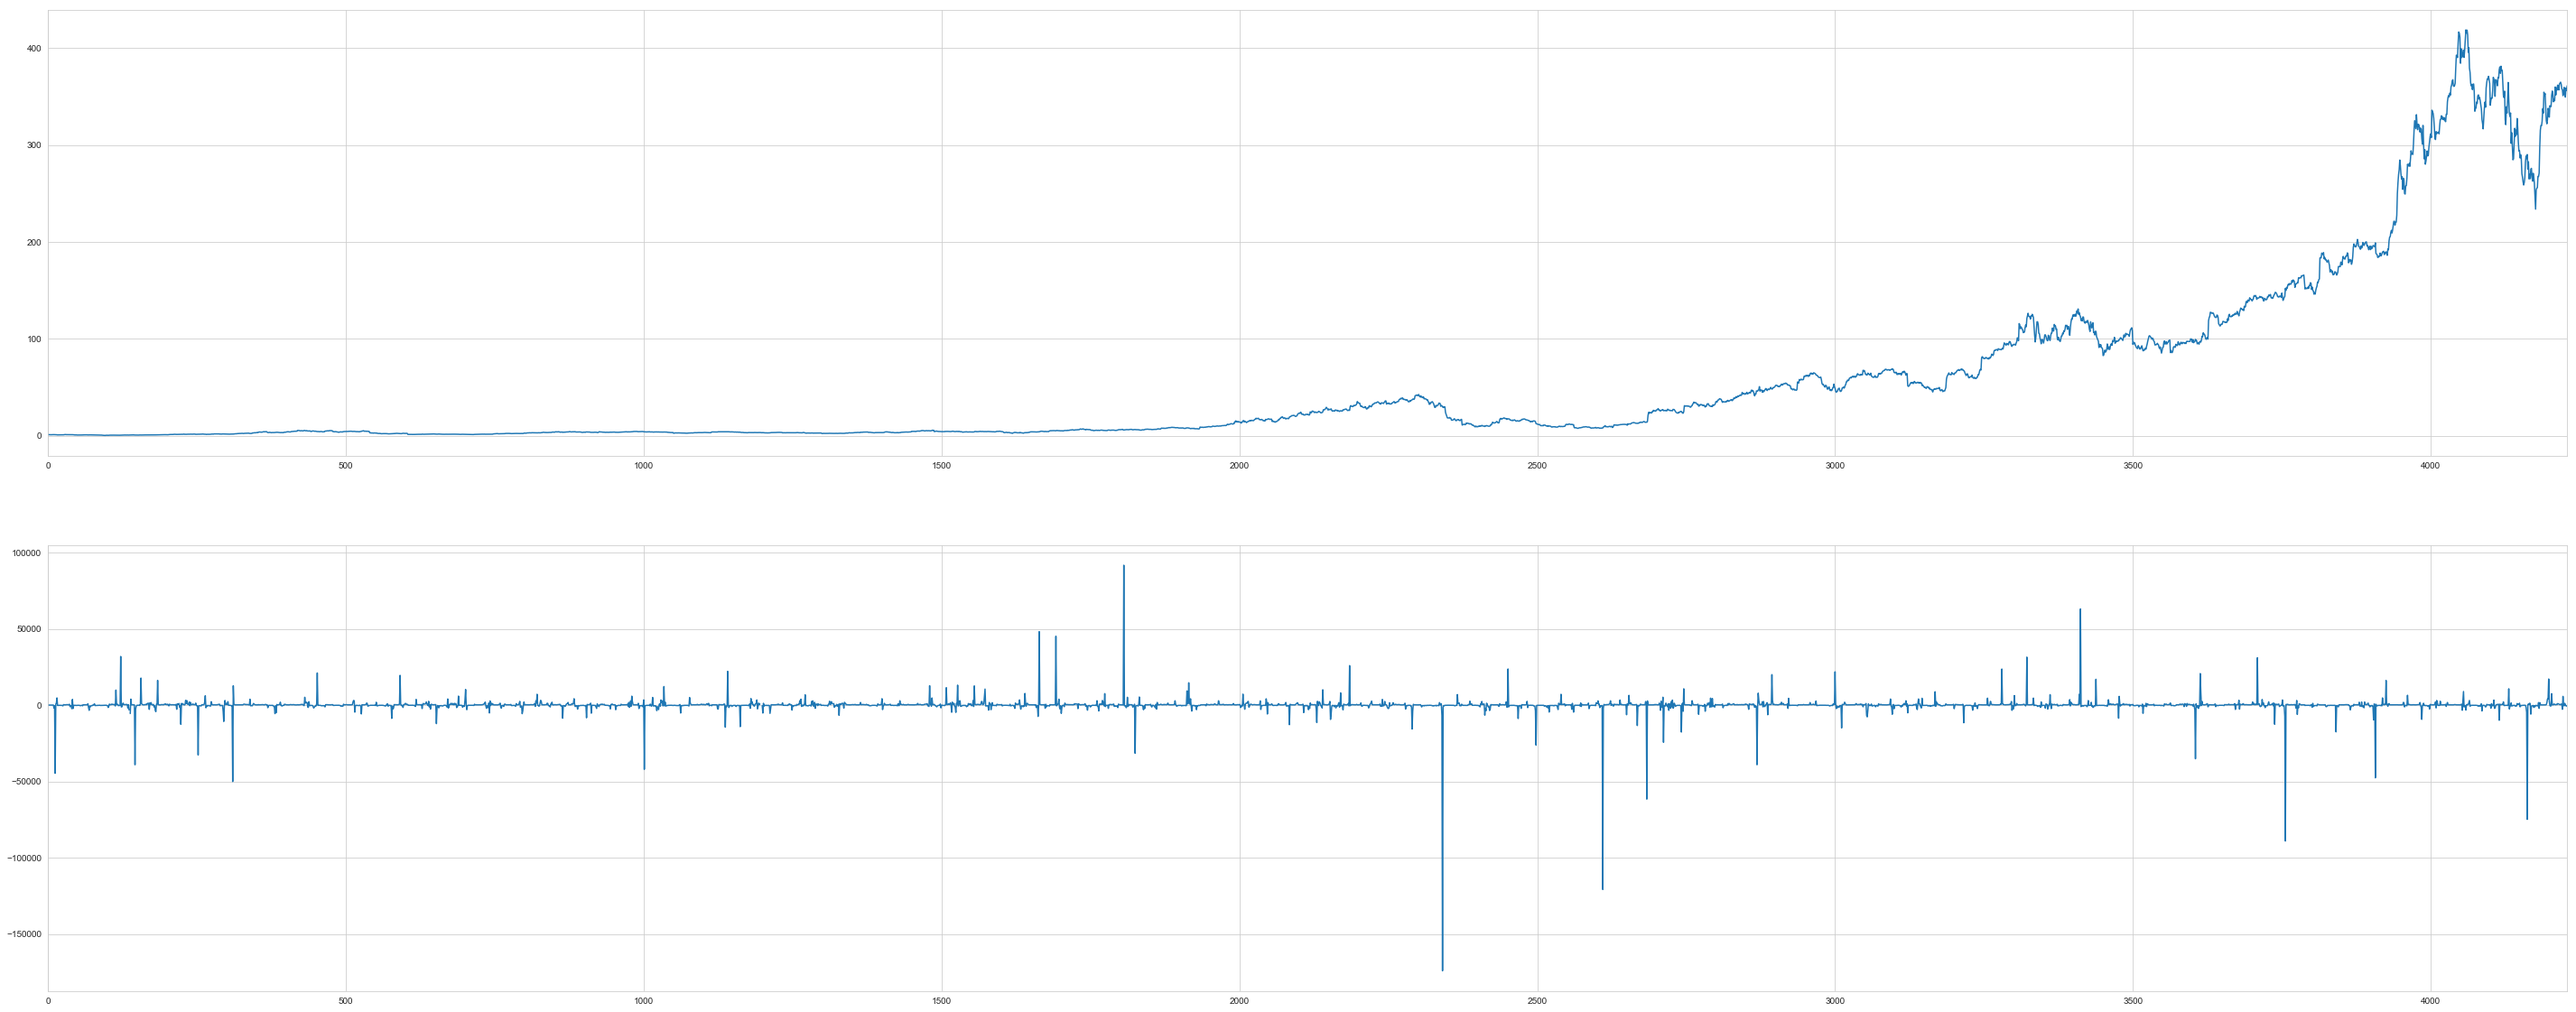

In [16]:
#10 Chande Momentum Oscillator (MOM)
def cmo(timeFrame):
    x=timeFrame
    CMO = []
    for i in range(0,timeFrame):
        CMO.append(0);
    NFLX['Diff'] = NFLX['Close'].diff()
    while x < len(NFLX['Close']):
        upSum=0
        downSum=0
        y=x-timeFrame+1
        while y<x:
            if NFLX['Diff'][y]>=0:
                upSum += NFLX['Diff'][y]
            else:
                downSum += NFLX['Diff'][y]
            y+=1
        curCMO = ((upSum-downSum)/(upSum+float(downSum)))*100
        CMO.append(curCMO)
        x+=1
    NFLX['CMO'] = CMO
    return
cmo(10)
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CMO'].plot(subplots=False,figsize=(50,20))

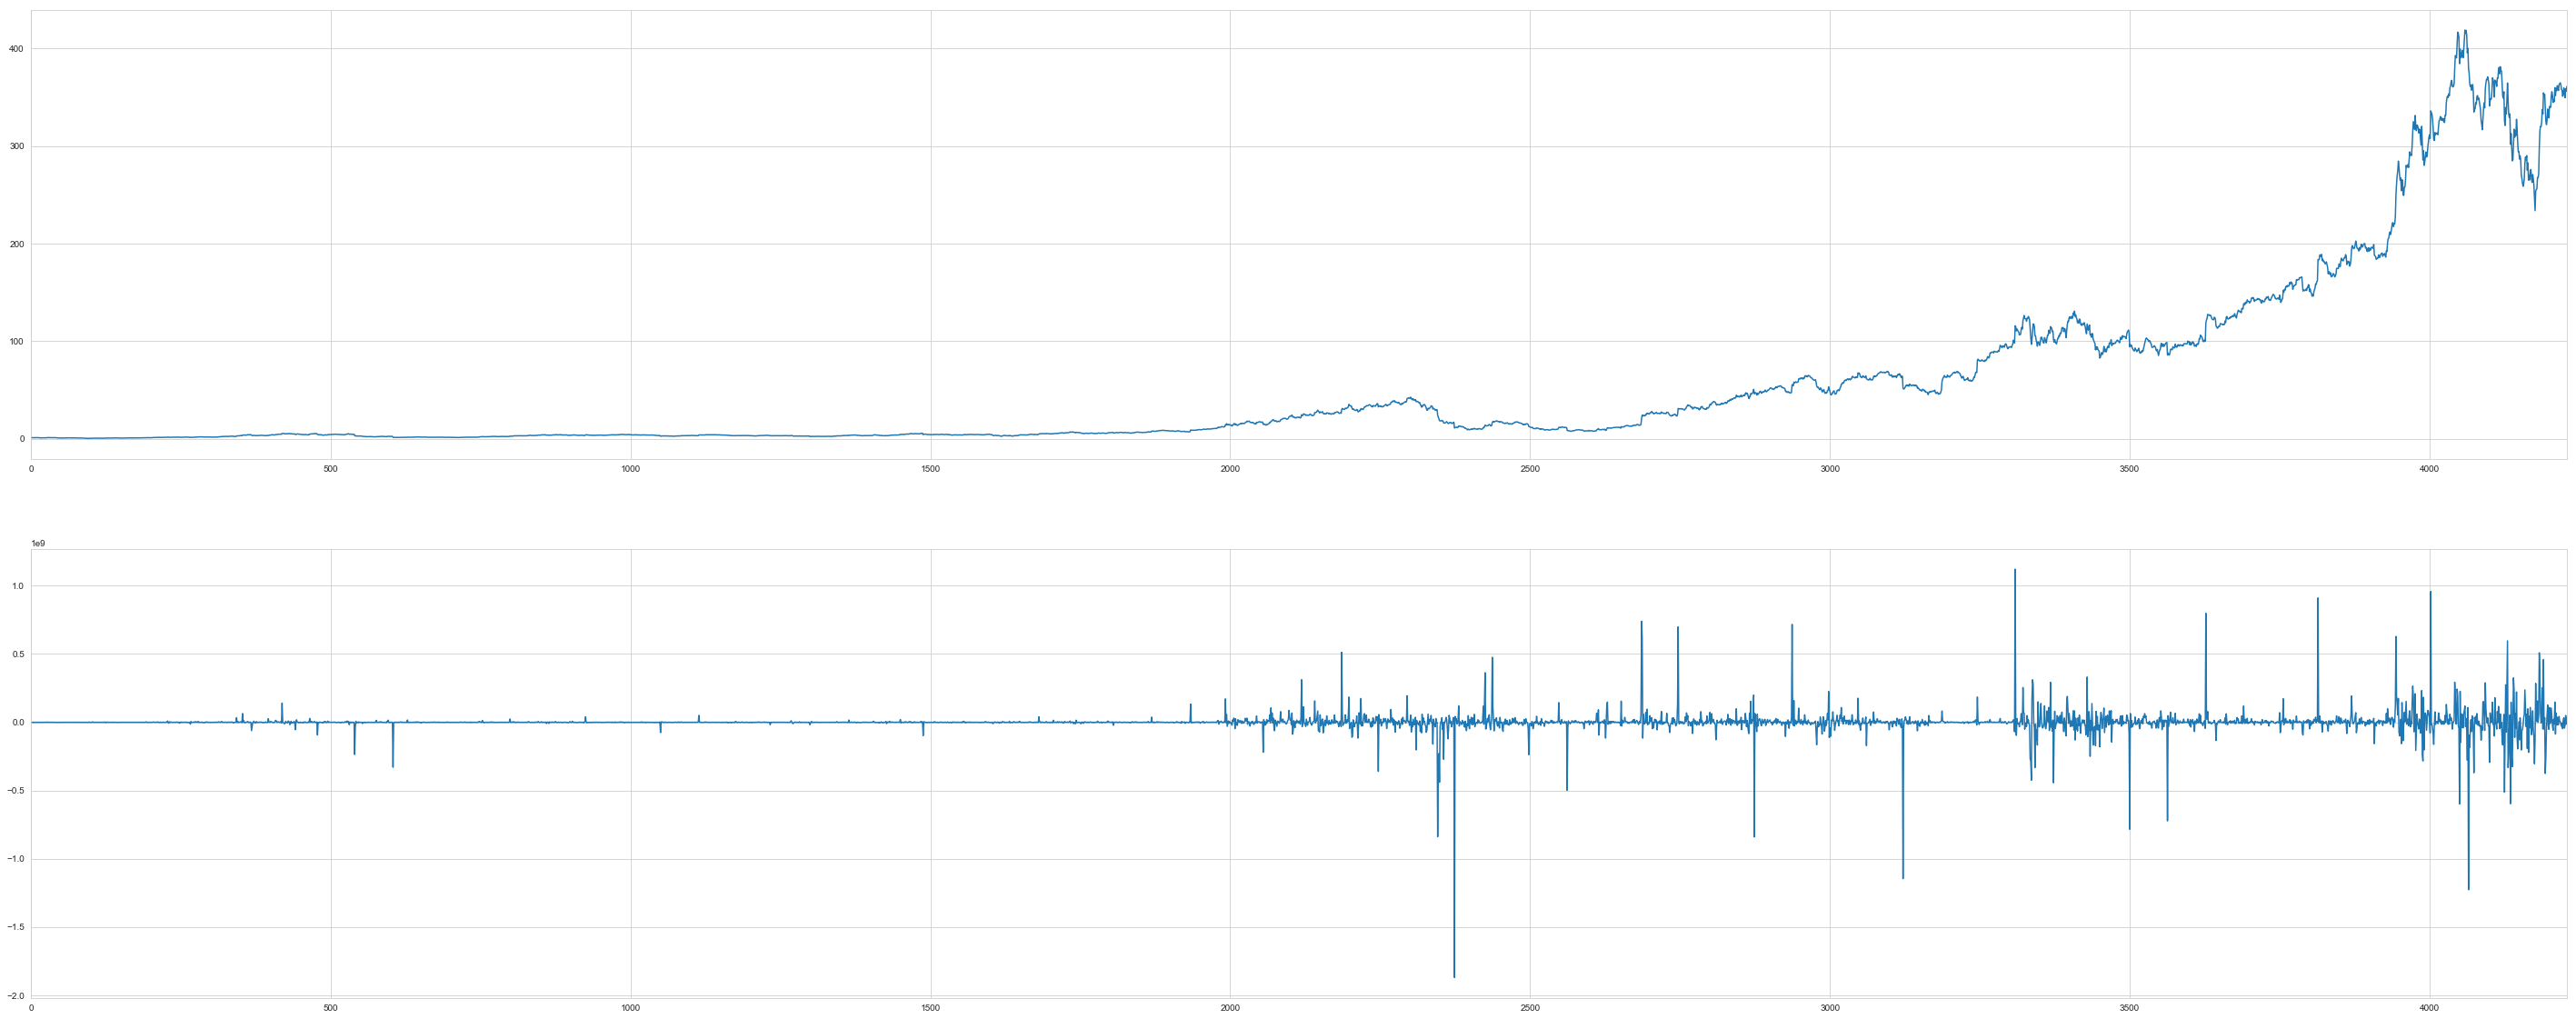

In [17]:
#11 Force Index (FI)
FI = np.array([])
FI = np.append(FI, np.nan)
for i in range(1,len(NFLX['Close'])):
    FIVal = (NFLX['Close'][i] - NFLX['Close'][i-1])*NFLX['Volume'][i]
    FI = np.append(FI,FIVal)
NFLX['FI']=FI
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['FI'].plot(subplots=False,figsize=(50,20))

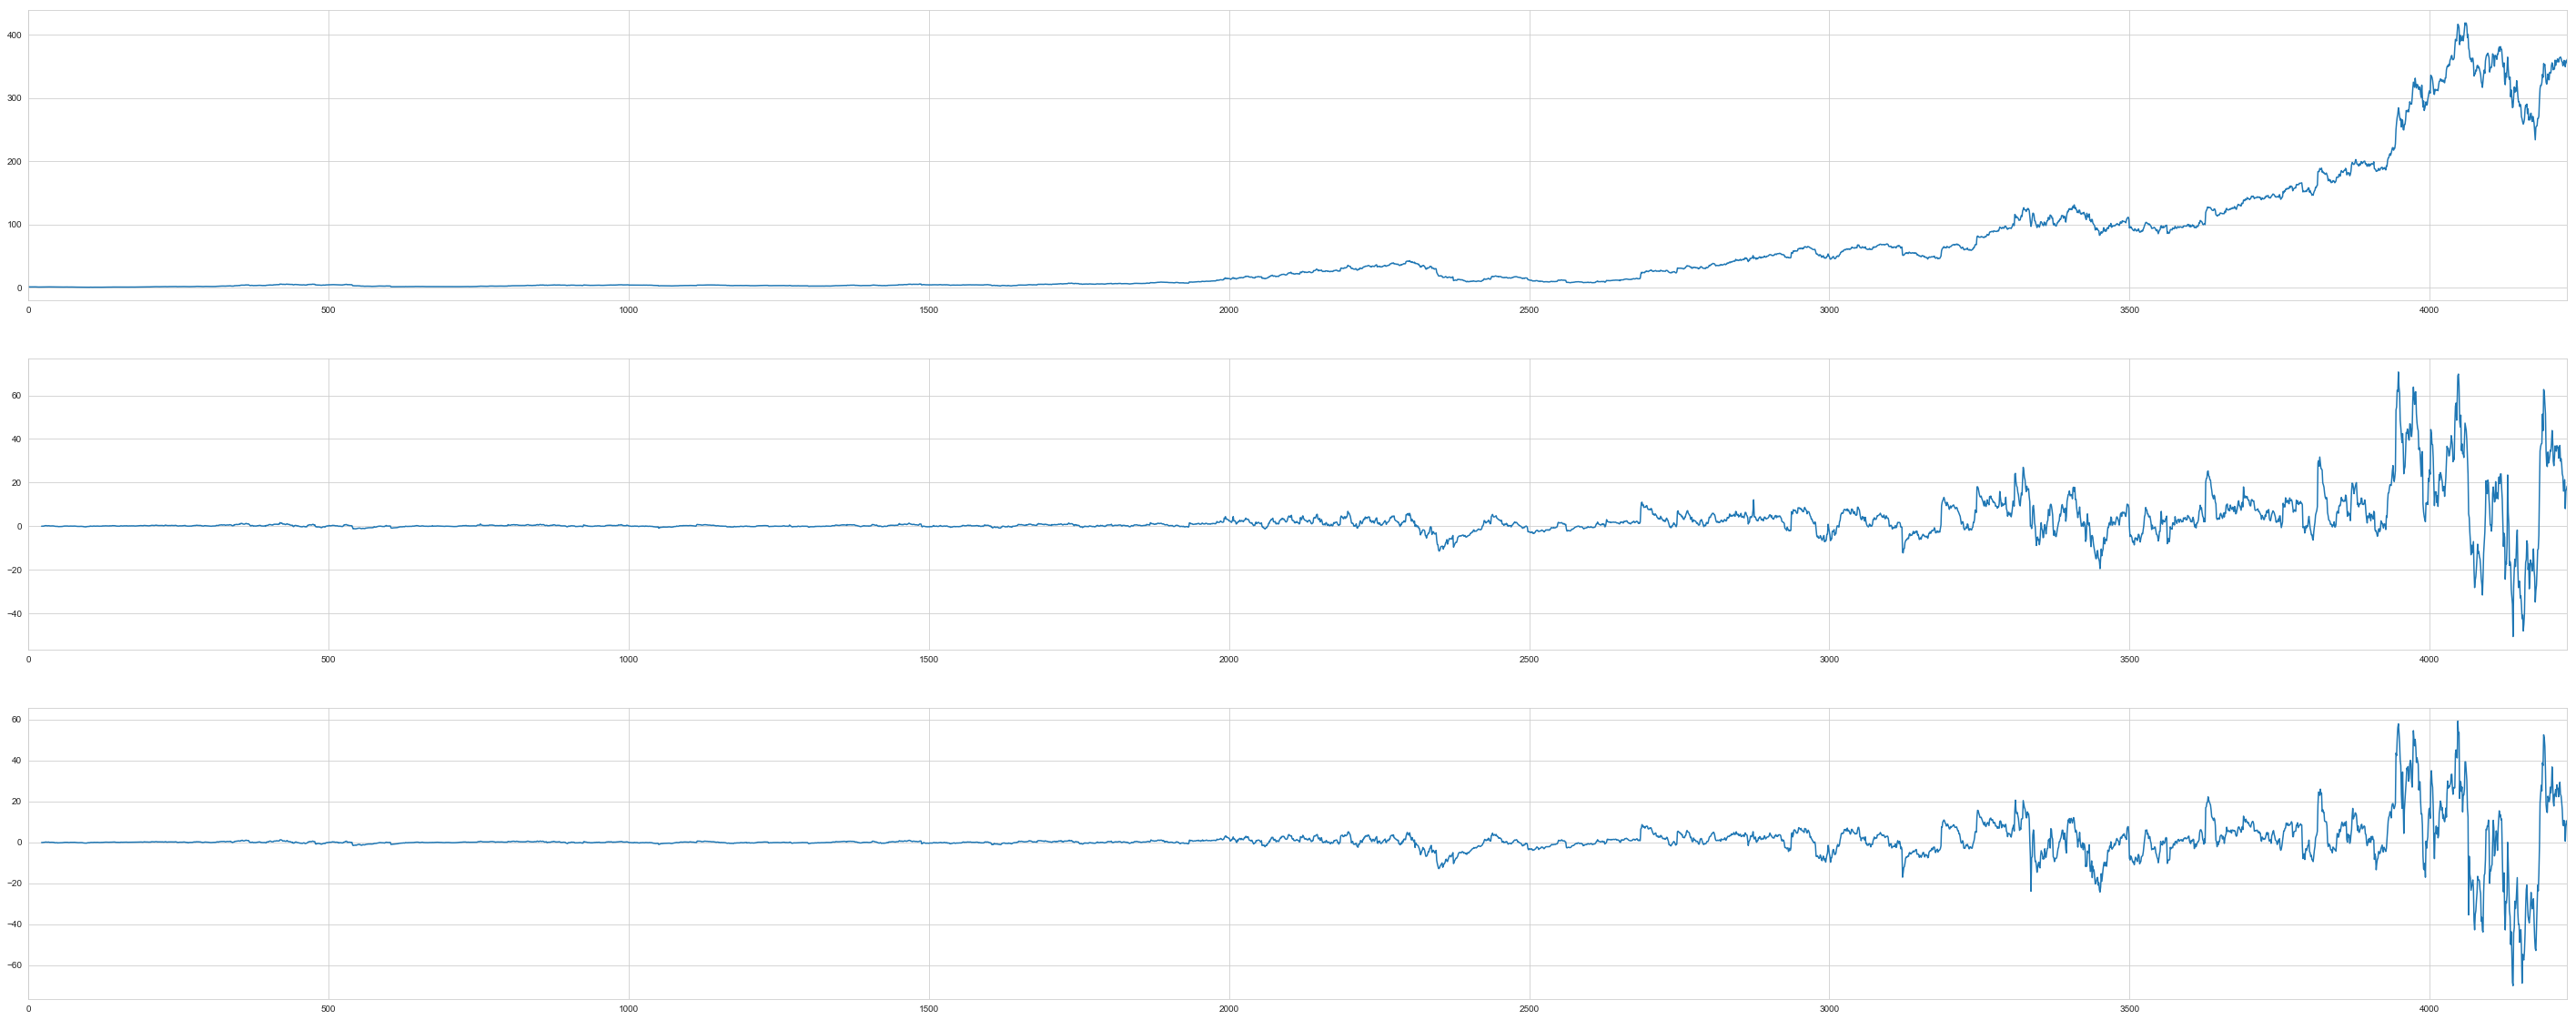

In [18]:
#12 Elder-ray
BullPower = np.array([])
BullPower = np.append(BullPower, [np.nan]*emaPeriod)
BearPower = np.array([])
BearPower = np.append(BearPower, [np.nan]*emaPeriod)
for i in range(emaPeriod,len(NFLX['Close'])):
    BullP = NFLX['High'][i] - NFLX['EMA of 22 Days'][i]
    BullPower = np.append(BullPower,BullP)
    BearP = NFLX['Low'][i] - NFLX['EMA of 22 Days'][i]
    BearPower = np.append(BearPower,BearP)
NFLX['BullPower'] = BullPower
NFLX['BearPower'] = BearPower
plt.figure()
plt.subplot(3,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,2)
NFLX['BullPower'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,3)
NFLX['BearPower'].plot(subplots=False,figsize=(50,20))

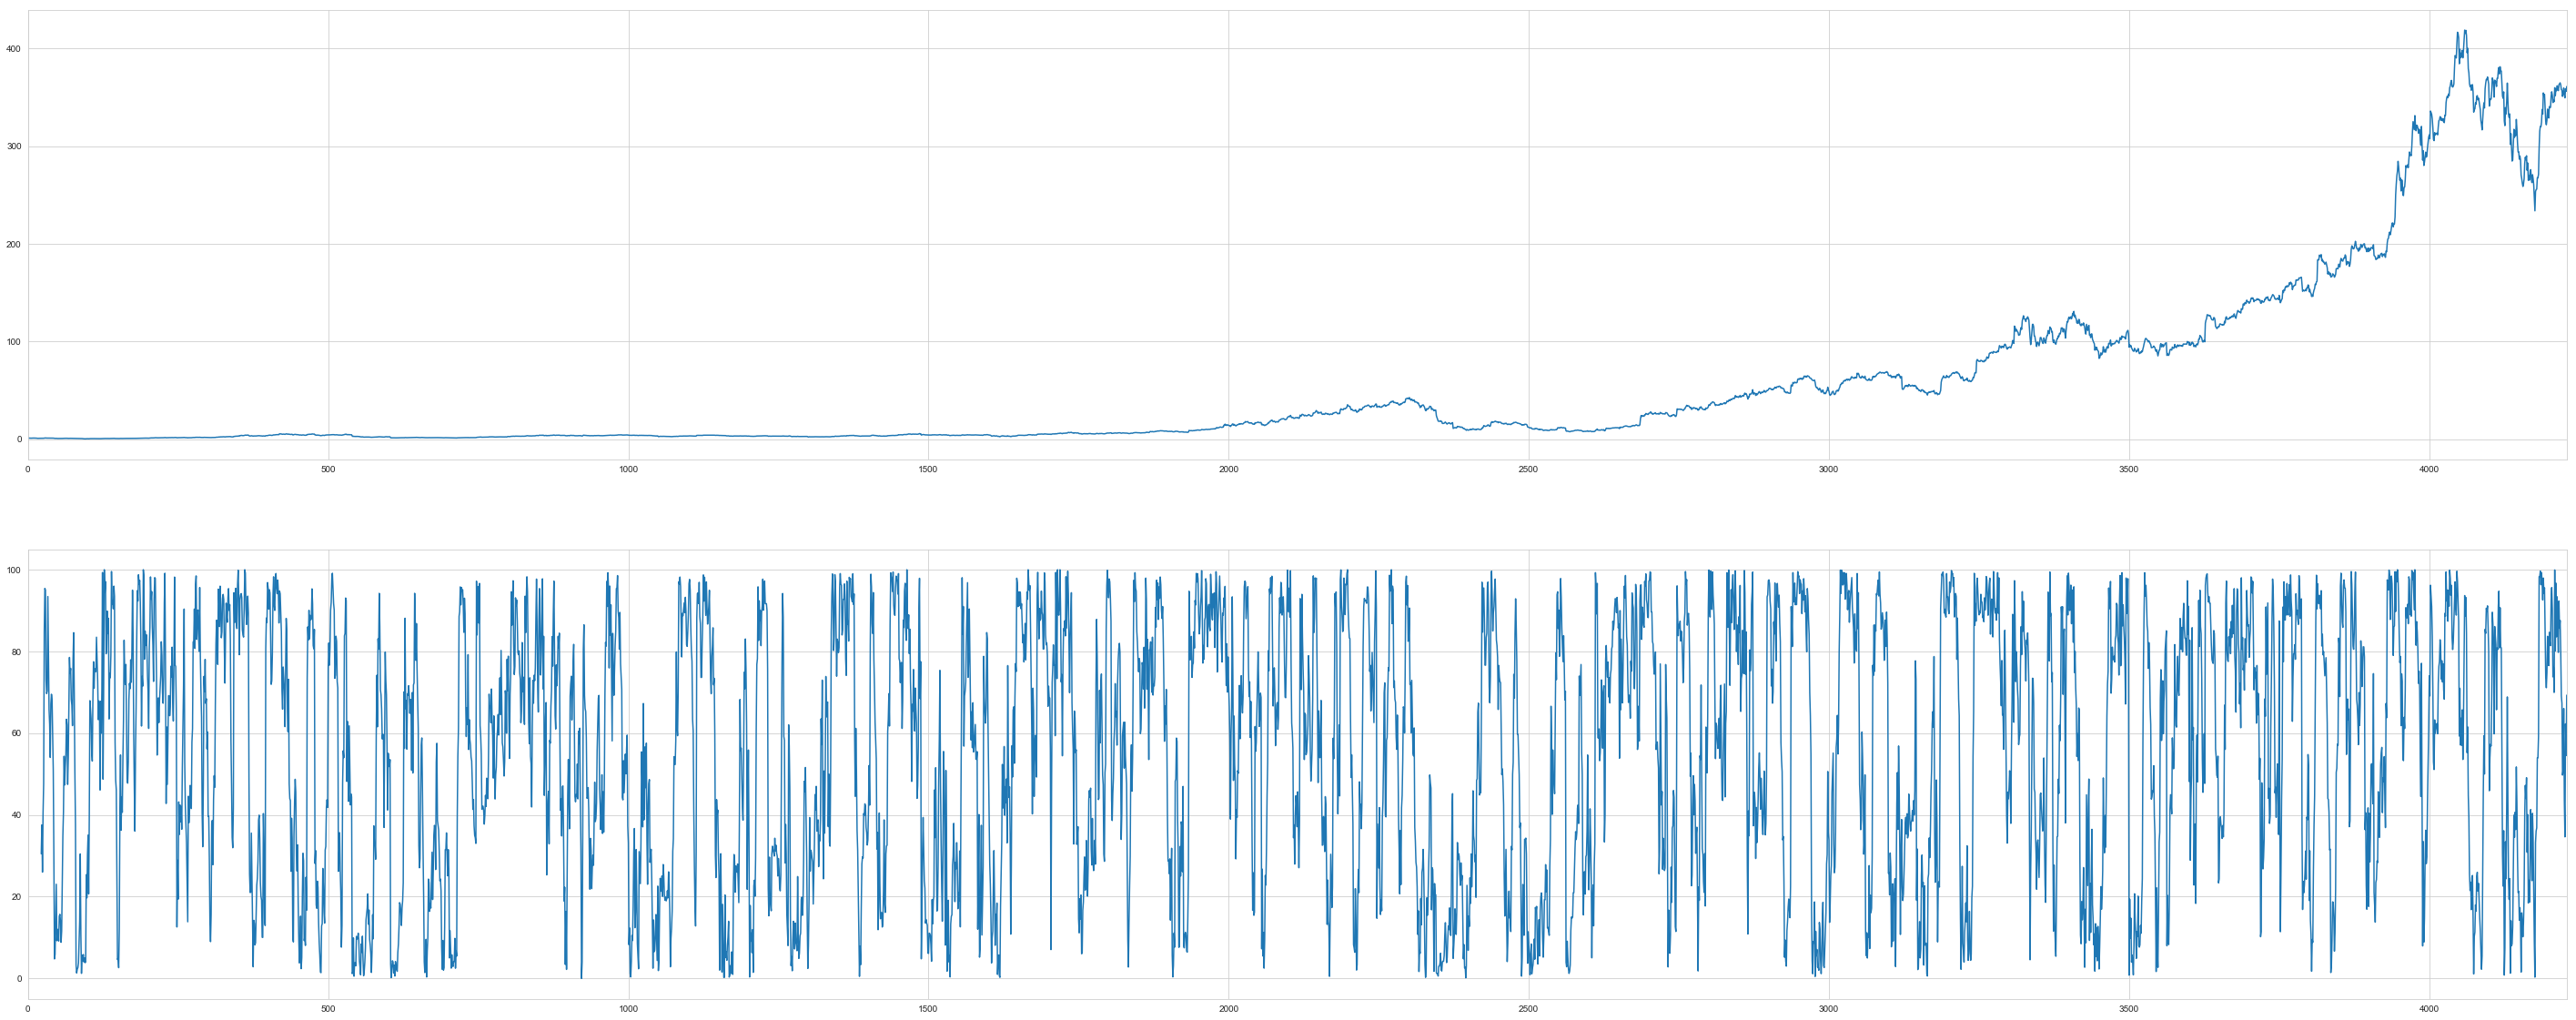

In [19]:
#13 Stochastic %k (STCK)
def HighestLowest(n,period):
    high=NFLX['High'][n]
    low=NFLX['Low'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return high,low
STCK = np.array([])
STCK = np.append(STCK, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high,low=HighestLowest(i,emaPeriod)
    PK = 100*(NFLX['Close'][i+emaPeriod] - low)/(high - low)
    STCK = np.append(STCK, PK)
NFLX['STCK'] = STCK
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCK'].plot(subplots=False,figsize=(50,20))

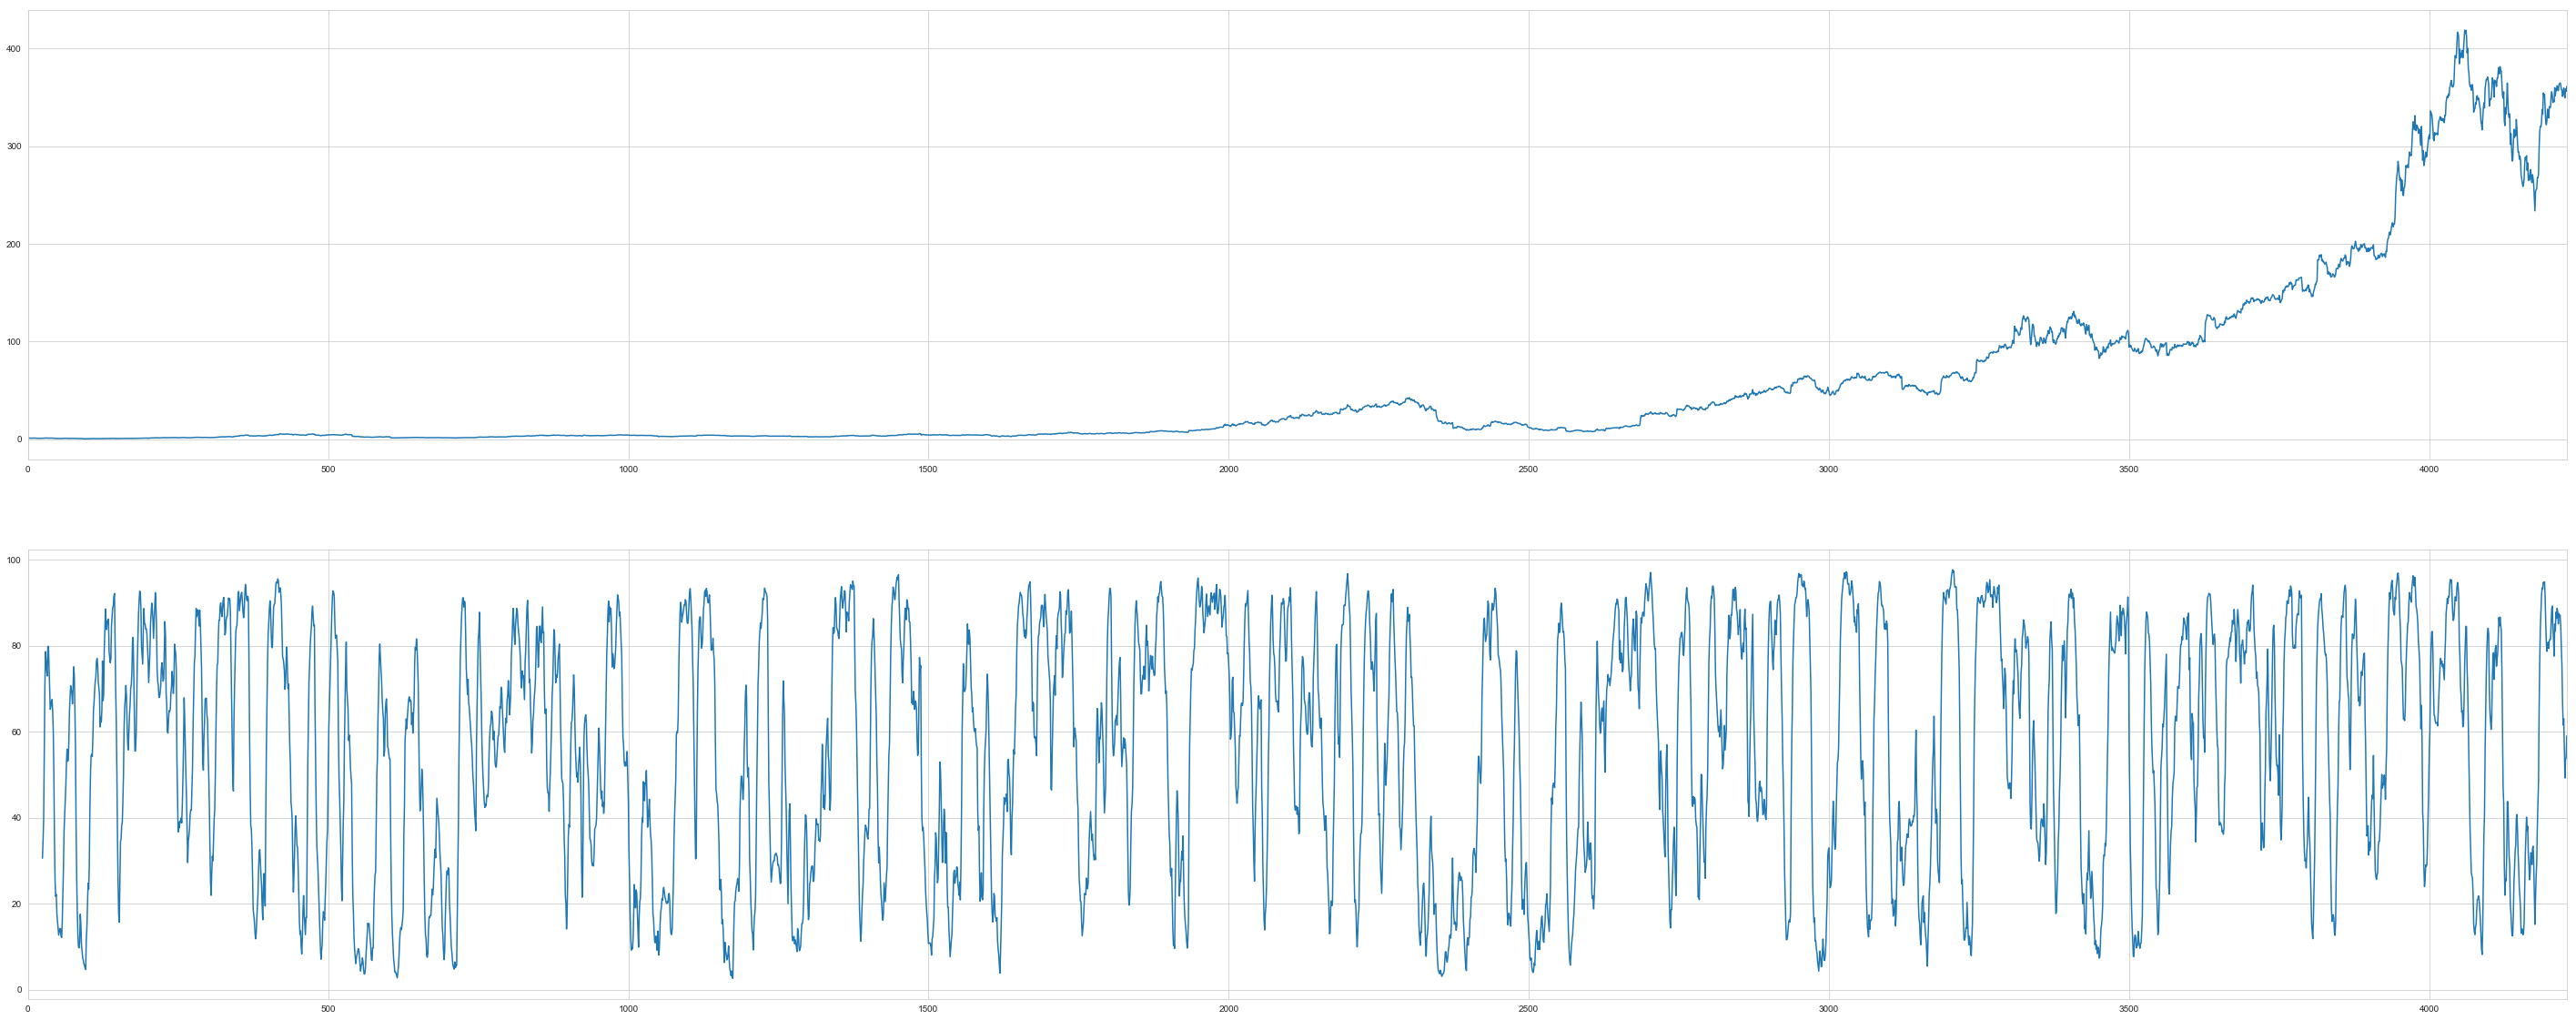

In [20]:
#14 Stochastic %D (STCD)
NFLX['STCD'] = NFLX['STCK'].ewm(com = 2 , min_periods = 3).mean()
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCD'].plot(subplots=False,figsize=(50,20))

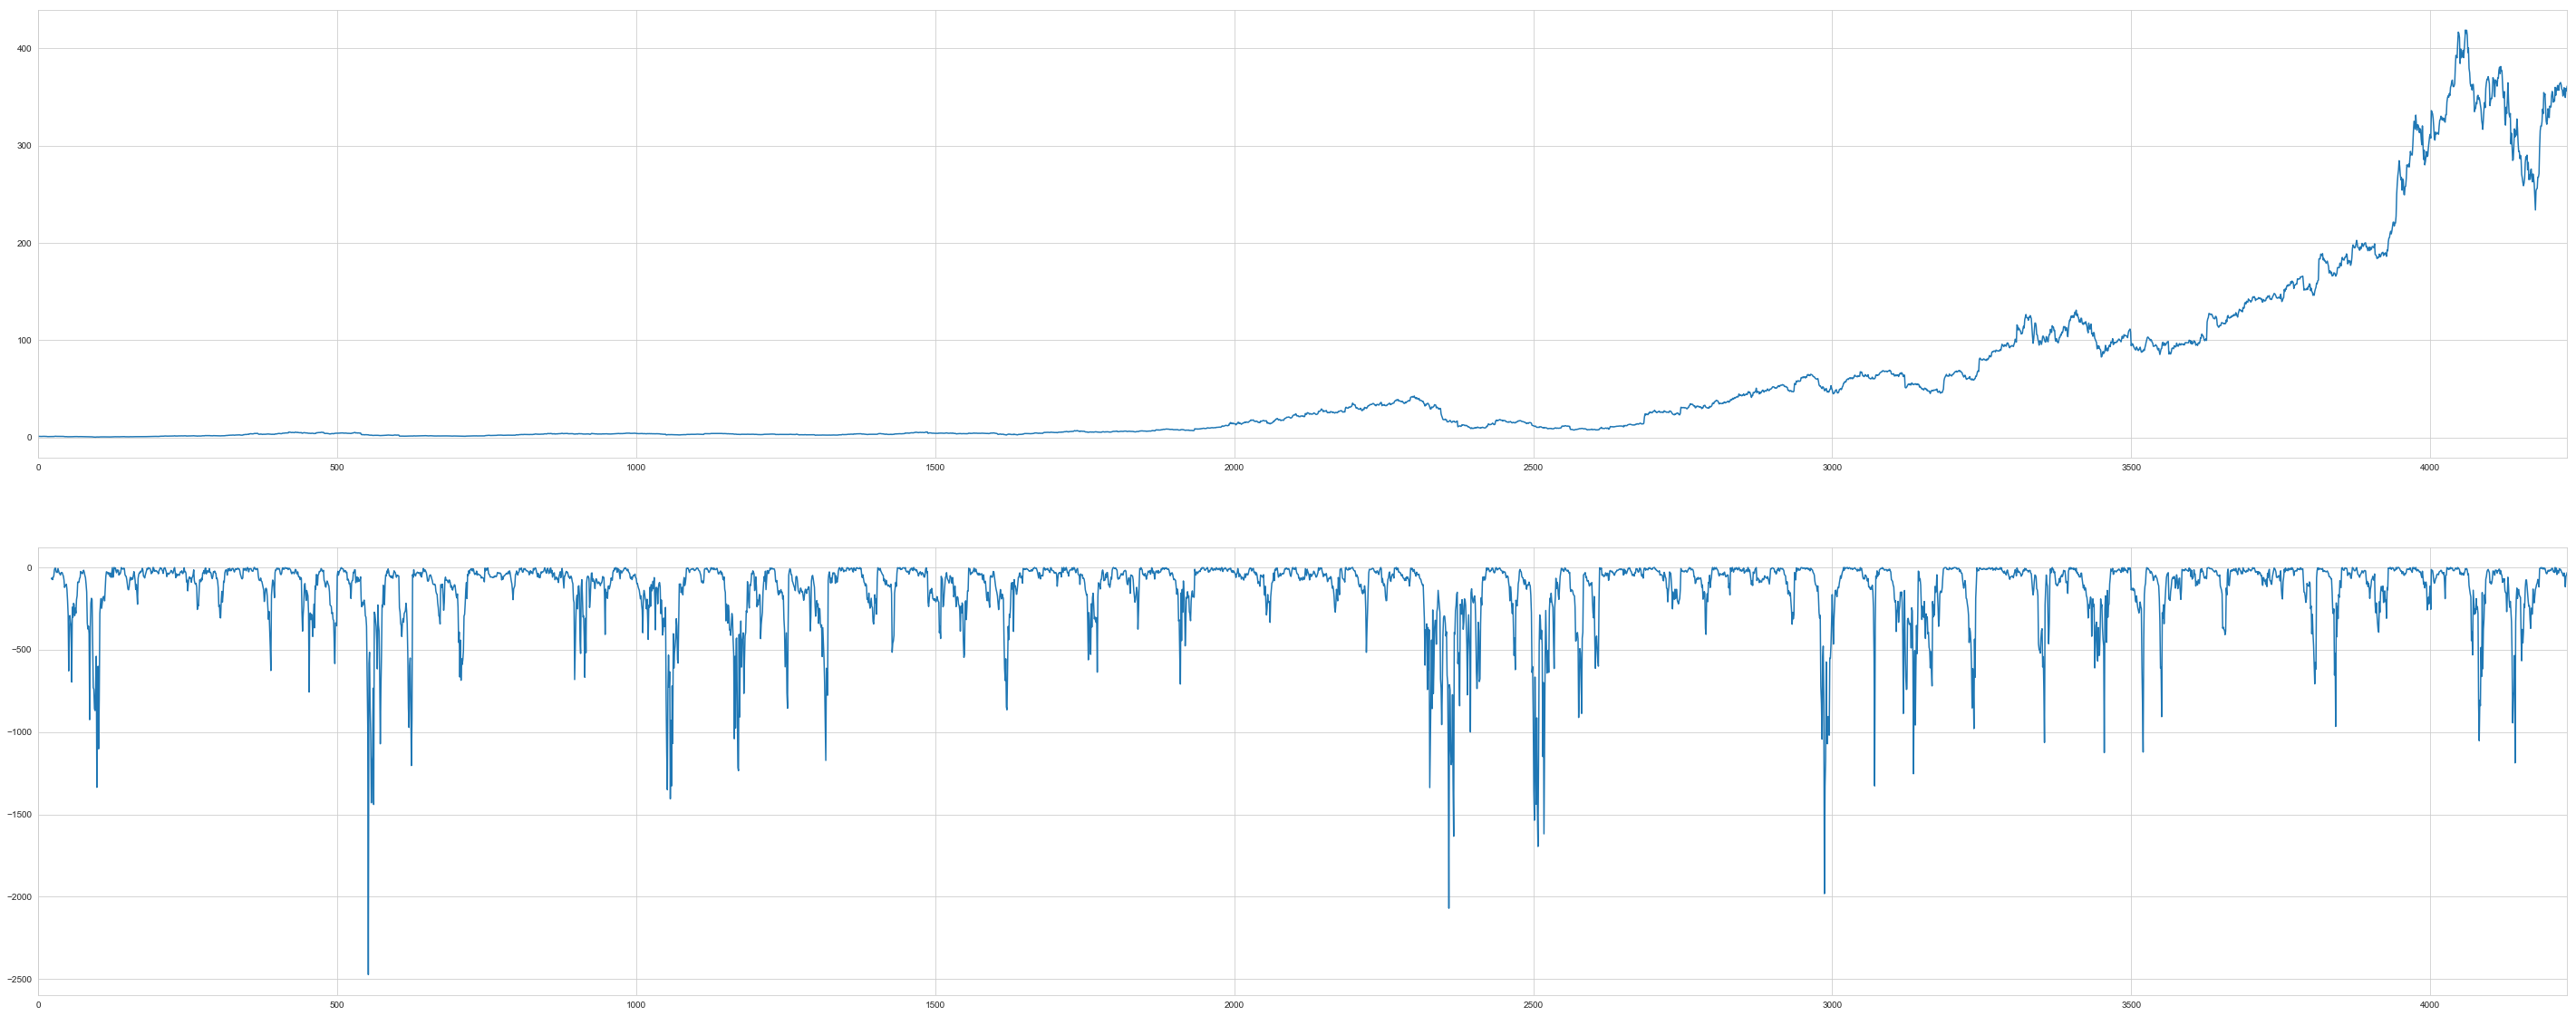

In [21]:
#15 Williams %R
def Highest(n,period):
    high=NFLX['High'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
    return high
def Lowest(n,period):
    low=NFLX['Low'][n]
    for i in range(n,period+1):
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return low
WilliamsR = np.array([])
WilliamsR = np.append(WilliamsR, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high=Highest(i,emaPeriod)
    low=Lowest(i,emaPeriod)
    W = ((-100)*(high - NFLX['Close'][i+emaPeriod]))/((high - float(low)))
    WilliamsR = np.append(WilliamsR, W)
NFLX['WilliamsR'] = WilliamsR
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['WilliamsR'].plot(subplots=False,figsize=(50,20))

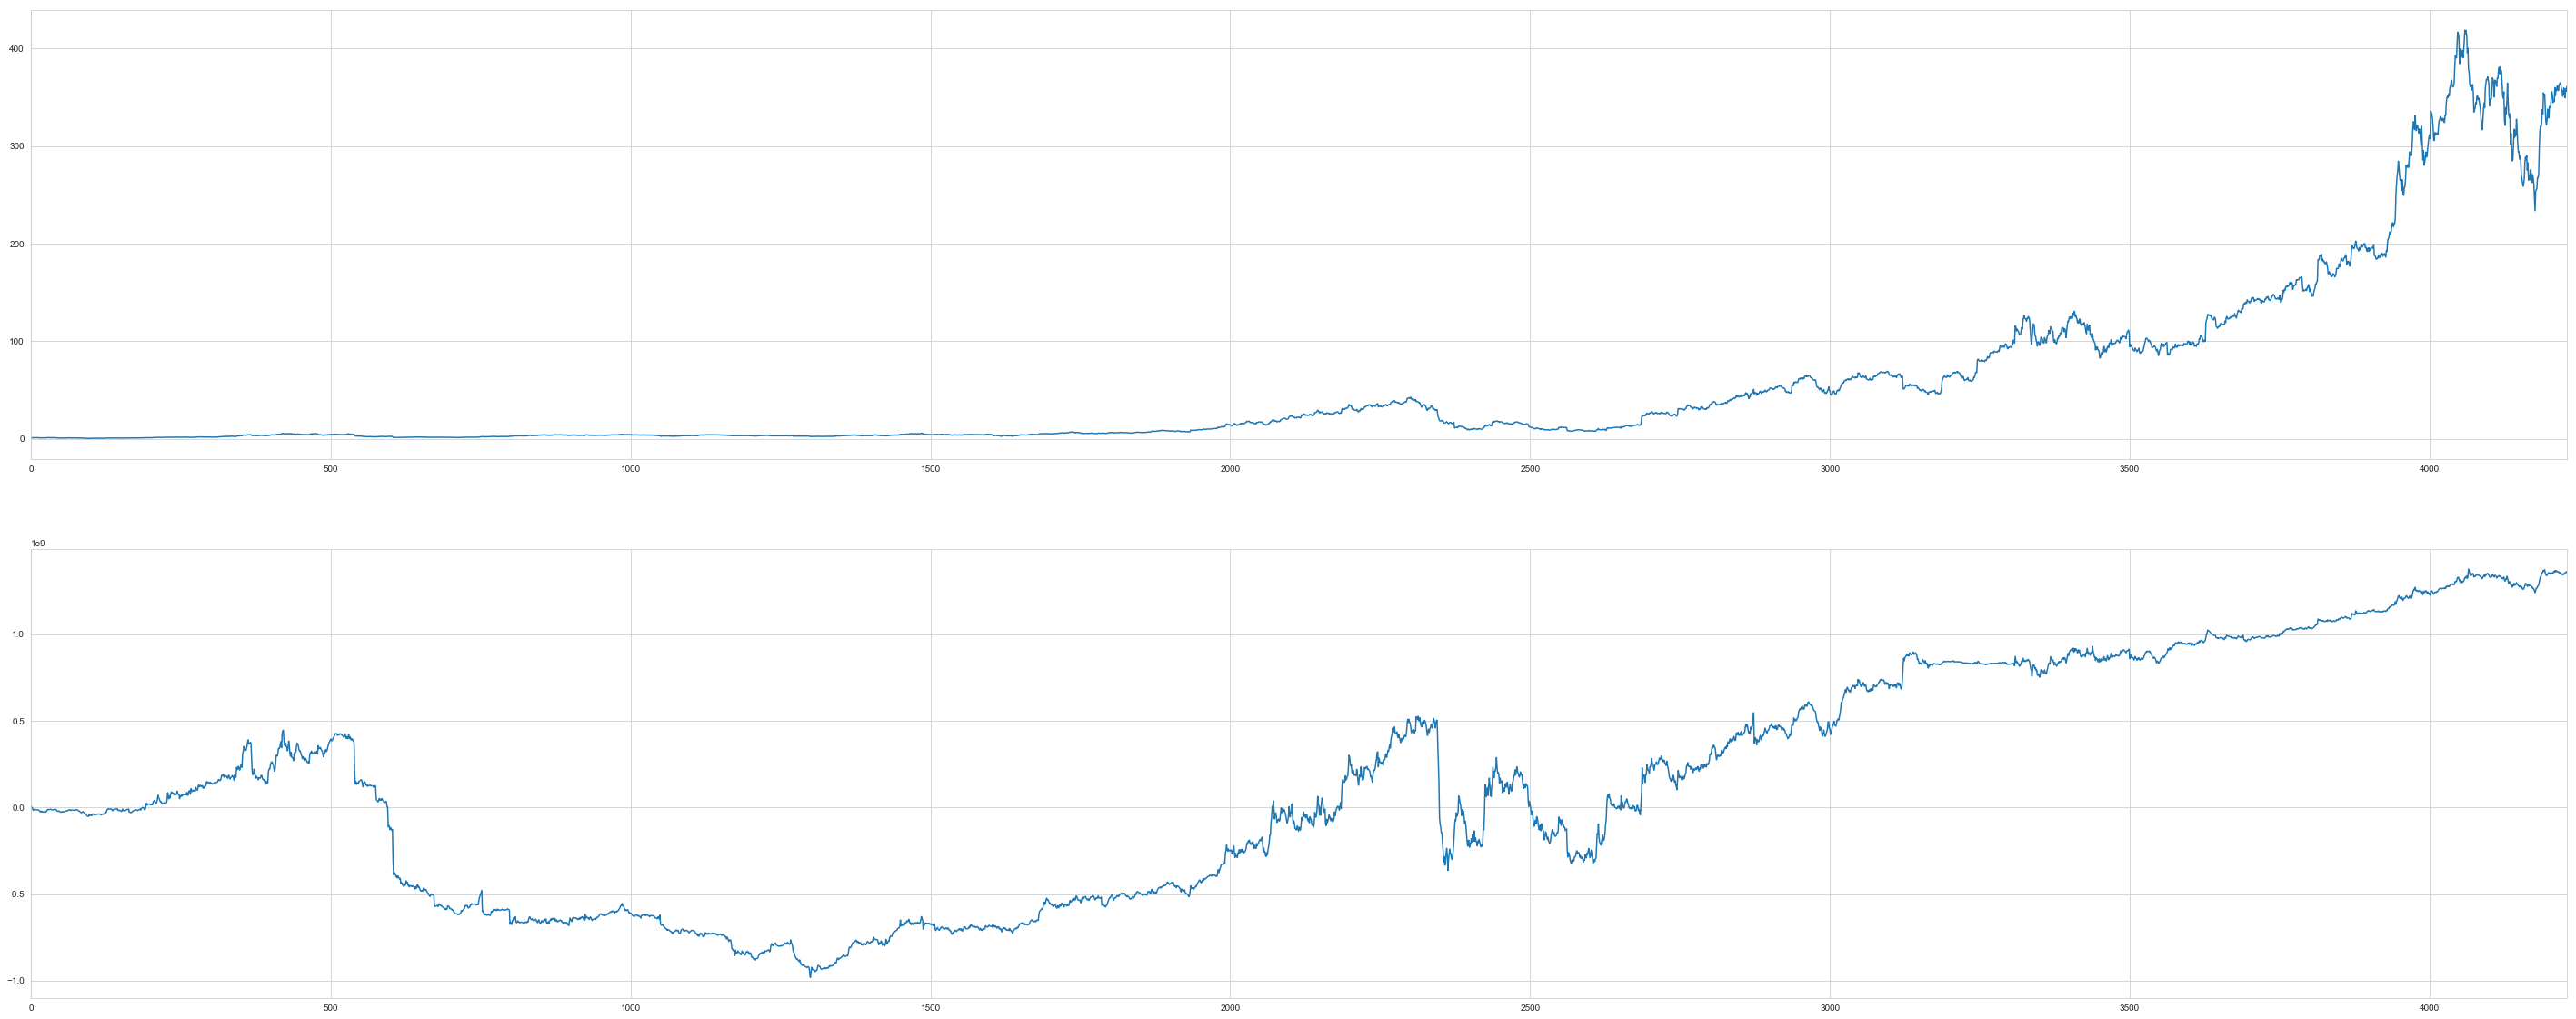

In [22]:
#16  Accumulation Distribution Oscillation (ADO)
NFLX['Multiplier']= (2*NFLX['Close']-NFLX['High']-NFLX['Low'])/(NFLX['High']-NFLX['Low'])
NFLX['MVolume']=NFLX['Multiplier']*NFLX['Volume']
ADL = np.array([])
ADL = np.append(ADL,NFLX['MVolume'][0])
for i in range(1,len(NFLX['Close'])):
    Adl = ADL[i-1] + NFLX['MVolume'][i]
    ADL = np.append(ADL,Adl)
NFLX['ADL'] = ADL
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['ADL'].plot(subplots=False,figsize=(50,20))

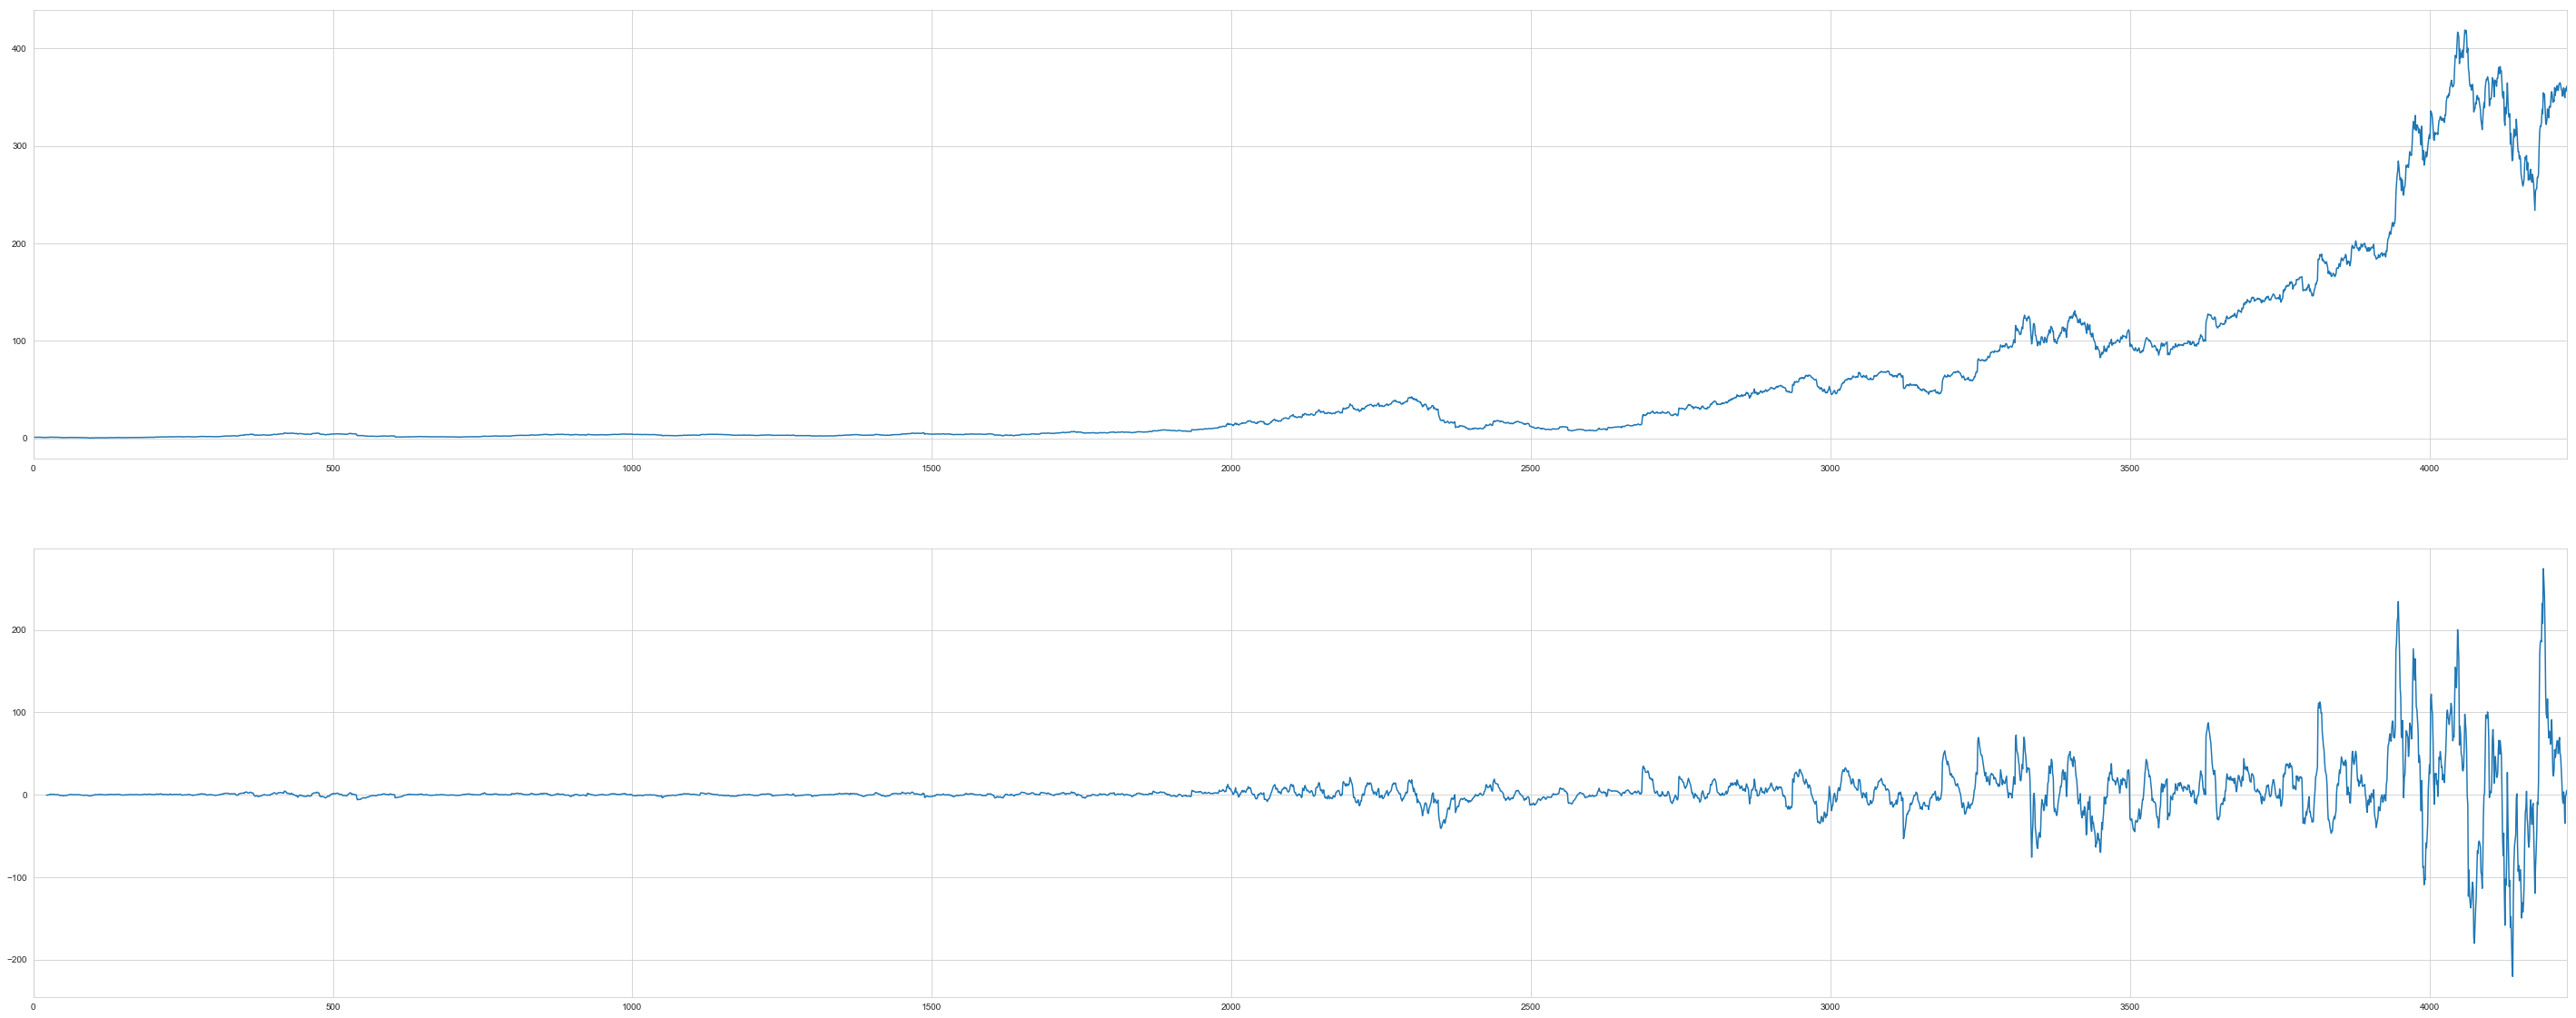

In [23]:
#17 Commodity Channel Index (CCI)
def mad(n,period):
    sum=0
    for i in range(n,n+period+1):
        sum+=abs(NFLX['TP']-NFLX['SMP of TP'])
    return high
NFLX['TP'] = (NFLX['Close']+NFLX['High']+NFLX['Low'])/3
NFLX['SMP of TP'] = NFLX['TP'].rolling(emaPeriod).mean()
MAD = np.array([])
MAD = np.append(MAD,[np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    su = mad(i,emaPeriod)
    MAD = np.append(MAD,su/float(emaPeriod))
NFLX['MAD of TP'] = MAD
NFLX['CCI'] = (NFLX['TP'] - NFLX['SMP of TP'])/(0.015*NFLX['MAD of TP'])
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CCI'].plot(subplots=False,figsize=(50,20))

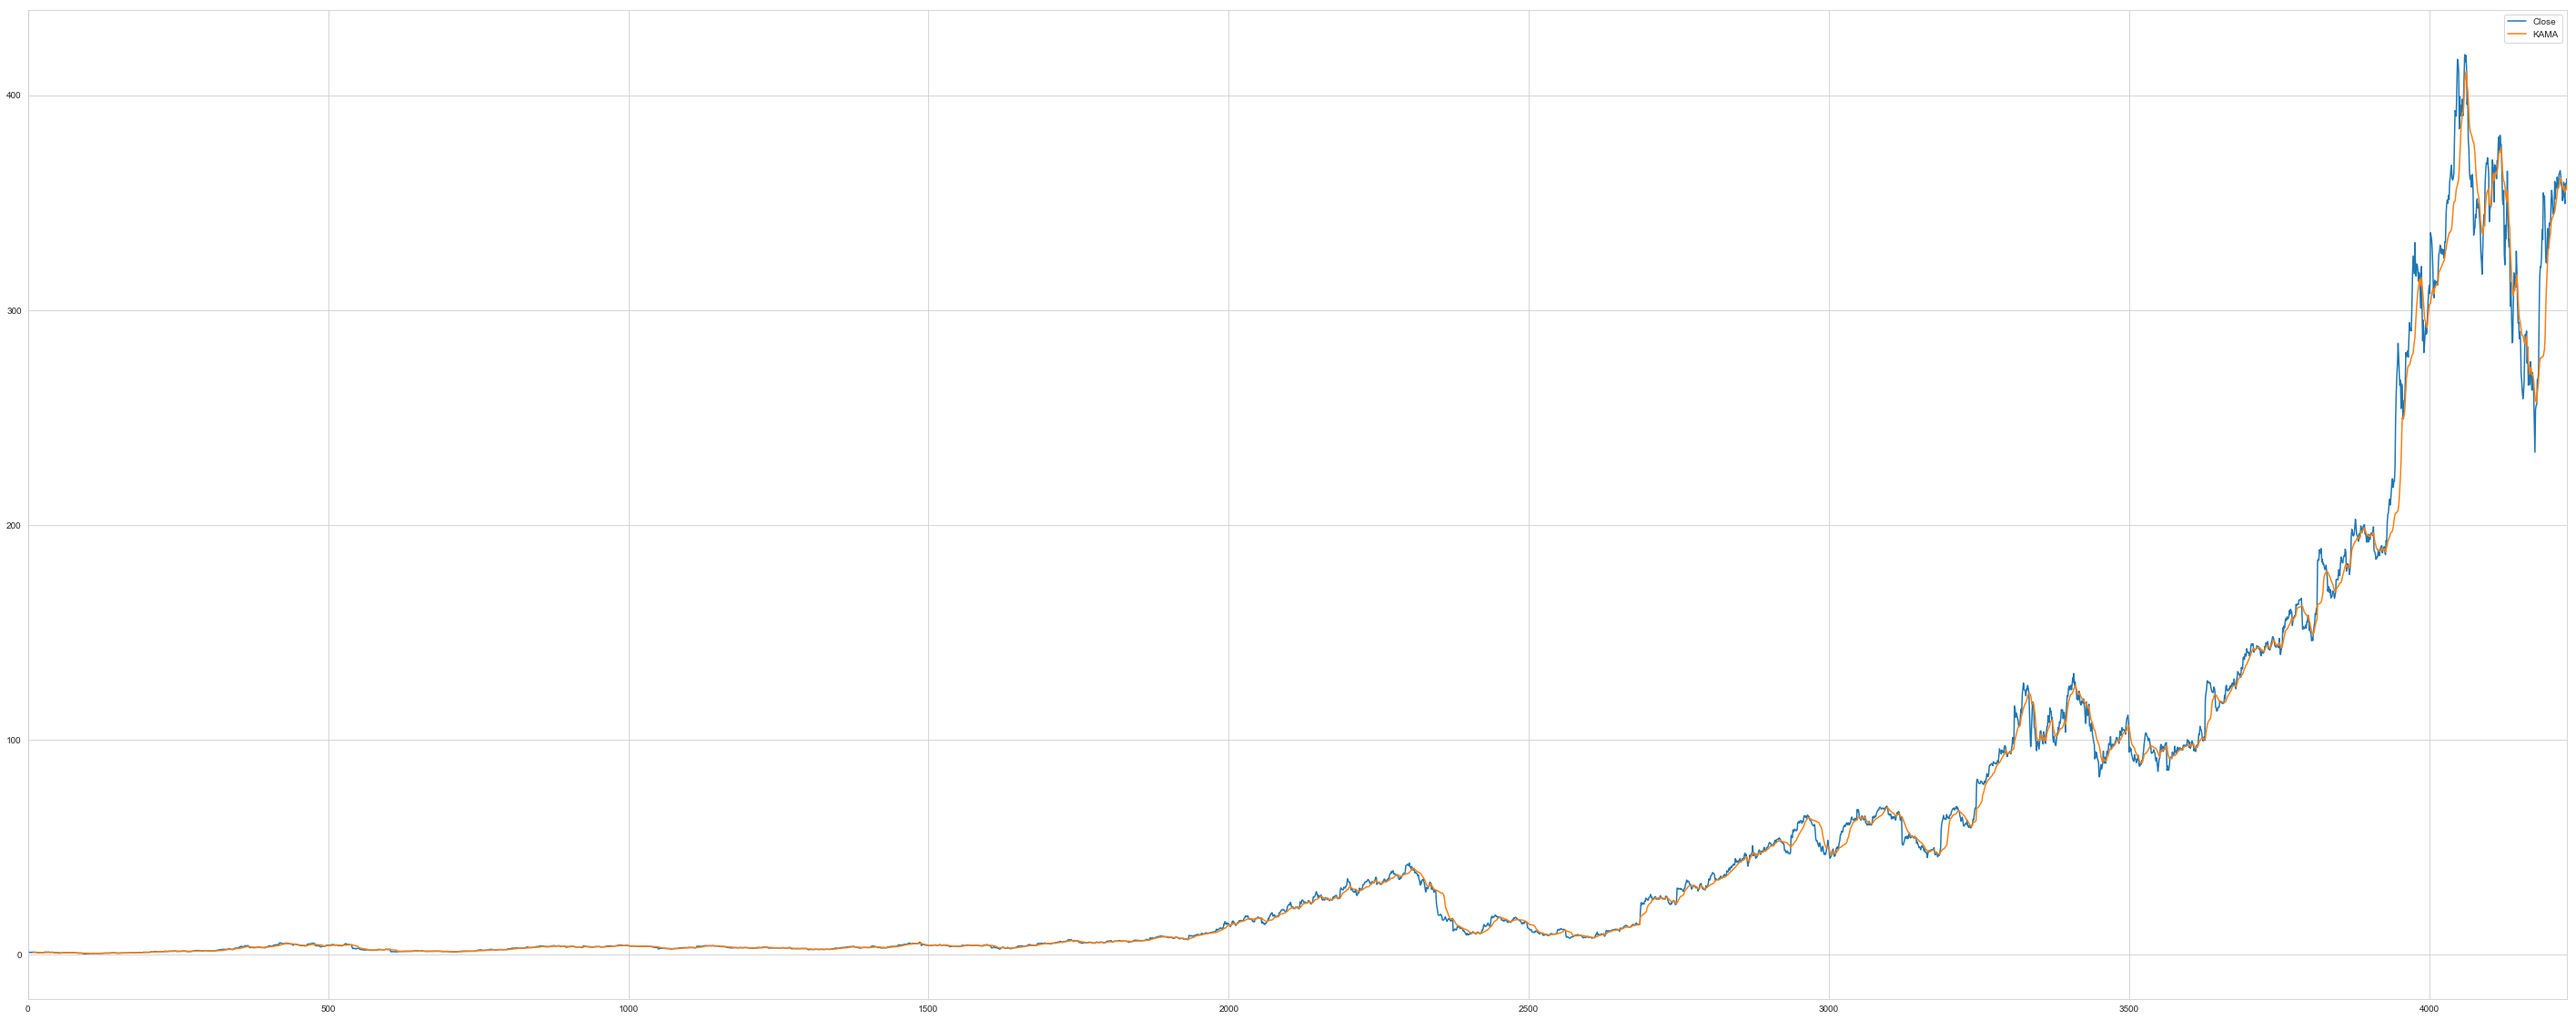

In [24]:
#18 Kaufman's Adaptive Moving Average (KAMA)
KAMA = np.array([])
KAMA = np.append(KAMA,[np.nan]*9)
KAMA = np.append(KAMA,NFLX['Close'][9])
Volitality = np.array([])
Volitality = np.append(Volitality, np.nan)
for i in range(1,len(NFLX['Close'])):
    Volitality = np.append(Volitality, abs(NFLX['Close'][i]-NFLX['Close'][i-1]))
Change = np.array([])
Change = np.append(Change,[np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    Change = np.append(Change, abs(NFLX['Close'][i]-NFLX['Close'][i-10]))
ER = np.array([])
ER = np.append(ER, [np.nan]*10)
for i in range(1,len(NFLX['Close'])-9):
    sum=0;
    for j in range(i,i+9):
        sum+=Volitality[j]
    Val=Change[i+9]/sum
    ER = np.append(ER,Val)
SC = np.array([])
SC = np.append(SC, [np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    slowest = 2.0/3.0
    fastest = 2.0/31.0
    S = pow((ER[i]*(fastest - slowest)+slowest),2)
    SC = np.append(SC, S)
for i in range(10,len(NFLX['Close'])):
    K = KAMA[i-1] + (NFLX['Close'][i]-KAMA[i-1])*SC[i]
    KAMA = np.append(KAMA,K)
NFLX['KAMA'] = KAMA
NFLX[['Close','KAMA']].plot(subplots=False,figsize=(50,20))

In [25]:
NFLX.to_csv("Test.csv", sep=',', encoding='utf-8')

In [26]:
#Correlation
globals()['Samsung'] = DataReader('005930.KS','yahoo',start,end)
globals()['AAPL'] = DataReader('AAPL','yahoo',start,end)
globals()['MSFT'] = DataReader('MSFT','yahoo',start,end)
CP = DataReader(['005930.KS','AAPL','MSFT'], 'yahoo', start, end)['Close']
pct_cg = CP.pct_change()
pct_cg=pct_cg.dropna()
pct_cg.head()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
AAPL['Close'].plot(subplots=False,figsize=(50,20))
MSFT['Close'].plot(subplots=False,figsize=(50,20))

In [ ]:
Samsung['Close'].plot(subplots=False,figsize=(50,20))

In [ ]:
# Comparing Samsung to itself will show a perfectly positive correlaton
sns.jointplot('005930.KS','005930.KS',pct_cg,kind='scatter',color='orange')

In [ ]:
# We'll use joinplot to compare the daily returns of Apple and MS.
sns.jointplot('AAPL','MSFT',pct_cg, kind='scatter',size=8, color='skyblue')

In [ ]:
# We can simply call pairplot ans use it to correlate every feature
sns.pairplot(pct_cg,size=3)

In [ ]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(pct_cg.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(CP.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
#Risk Analysis Bootstrap Method
sns.distplot(pct_cg['005930.KS'],bins=100)

In [ ]:
pct_cg['005930.KS'].quantile(0.01)

The 0.01 empirical quantile of daily returns is at -0.0356. That means that with 99% confidence, our worst daily loss will not exceed 3.5%. If we have a 1 million dollar investment, our one-day 1% VaR is 0.035 * 1,000,000 = $35,000.

In [ ]:
pct_cg['MSFT'].quantile(0.01)

In [ ]:
pct_cg['AAPL'].quantile(0.01)

In [ ]:
#Monte Carlo Simulation
#for MSFT
days = 260
last_price = CP['MSFT'][-1]
mu = pct_cg.mean()['MSFT']

In [ ]:
def monteCarlo(start_price,days,mu):
    price = np.zeros(days)
    price[0] = start_price
    for x in range(1,days):
        price[x] = price[x-1]*(1+np.random.normal(0,mu))     
    return price

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for MSFT')
plt.figure(figsize=(50,20))

In [ ]:
#for AAPL
last_price = CP['AAPL'][-1]
mu = pct_cg.mean()['AAPL']

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AAPL')

In [ ]:
#for Samsumg
last_price = CP['005930.KS'][-1]
mu = pct_cg.mean()['005930.KS']

In [ ]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Samsung')

In [ ]:
# Lets Dive Deeper
# For MSFT Stocks
days = 260
last_price = CP['MSFT'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
# for AAPL Stocks
days = 260
last_price = CP['AAPL'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
# for Samsung Stock
last_price = CP['005930.KS'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

In [ ]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [ ]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(Samsung['Close'])

In [ ]:
ts_log = np.log(Samsung['Close'])
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = ts_log.ewm(com=11,min_periods =12).mean()
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)

In [33]:
Features =  pd.read_csv('Features.csv')
Features.head()
#Features = NFLX[['KAMA','CCI','ADL','WilliamsR','STCD','STCK','BullPower','BearPower','FI','CMO','ATR','RSI','MACD','pctB','TEMA','UBB','LBB','EMA of 22 Days','MA for 22 days','ChandelierExitL','Close']]

KAMA         CCI          ADL  WilliamsR       STCD       STCK  \
0  0.998267  -40.738273 -25023053.07 -59.706923  34.622165  40.293077   
1  1.002480  -16.348074 -23617050.31 -52.381026  39.611461  47.618974   
2  1.002480   63.053644 -17162249.55 -15.201538  56.123403  84.798462   
3  1.011216   94.296914 -12204849.55  -4.578718  70.037028  95.421282   
4  1.017744  147.840000 -11269913.97  -4.999967  78.695885  95.000033   

   BullPower  BearPower            FI         CMO       ATR        RSI  \
0  -0.021665  -0.074522  5.144946e+05 -533.324000  0.069878  43.350193   
1   0.011662  -0.041910  1.309980e+05  285.185953  0.068842  47.507000   
2   0.151613  -0.004101  1.307929e+06  202.438900  0.074978  62.532858   
3   0.160409   0.063980  2.053801e+05  154.193688  0.076295  65.565703   
4   0.231963   0.146248  1.244973e+05  146.666641  0.076864  69.547629   

       MACD       pctB       UBB       LBB  EMA of 22 Days  MA for 22 days  \
0 -0.088608   7.592337  1.215962  0.866701        1.035236        1.041331   
1 -0.086708   9.340159  1.213539  0.865163        1.034767        1.039351   
2 -0.069744  17.065933  1.226474  0.860993        1.043387        1.043734   
3 -0.047596  18.606066  1.241279  0.853980        1.053877        1.047630   
4 -0.023768  20.296631  1.270045  0.839630        1.067323        1.054838   

   ChandelierExitL     Close  
0         0.972509  0.999286  
1         0.975618  1.027857  
2         0.957209  1.172857  
3         0.985402  1.214286  
4         1.045838  1.276429

In [34]:
np.where(np.isnan(Features['CCI']))

(array([], dtype=int64),)

In [32]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = Features.iloc[:,0:20]  
y = Features.iloc[:,-1] 
X

KAMA         CCI           ADL   WilliamsR       STCD       STCK  \
0    0.998267  -40.738273 -2.502305e+07  -59.706923  34.622165  40.293077   
1    1.002480  -16.348074 -2.361705e+07  -52.381026  39.611461  47.618974   
2    1.002480   63.053644 -1.716225e+07  -15.201538  56.123403  84.798462   
3    1.011216   94.296914 -1.220485e+07   -4.578718  70.037028  95.421282   
4    1.017744  147.840000 -1.126991e+07   -4.999967  78.695885  95.000033   
5    1.040931   99.533730 -1.285880e+07  -27.031367  76.735815  72.968633   
6    1.065684   70.784864 -1.247592e+07  -30.312616  74.344876  69.687384   
7    1.084202   70.660268 -1.192605e+07  -29.687647  72.984980  70.312353   
8    1.103892  117.723321 -9.718656e+06   -6.562498  79.855440  93.437502   
9    1.118986  118.702397 -1.250084e+07  -20.000087  79.903846  79.999912   
10   1.125270   63.216738 -1.346830e+07  -34.218833  75.180105  65.781167   
11   1.125643   42.952786 -1.378317e+07  -37.812457  70.839338  62.187543   
12   1.114252   25.757456 -1.465485e+07  -45.937486  65.238537  54.062514   
13   1.126149   43.442199 -1.353969e+07  -32.812490  65.888855  67.187510   
14   1.135151   39.207411 -1.181404e+07  -30.468803  67.103791  69.531197   
15   1.150577   37.715611 -1.035210e+07  -31.634554  67.524533  68.365446   
16   1.148860   37.956418 -1.133139e+07  -43.407650  64.864334  59.546336   
17   1.136790   -0.924435 -1.152879e+07  -52.535476  60.255191  51.039679   
18   1.131685  -39.191866 -1.613821e+07  -74.644960  50.313730  30.434794   
19   1.130727 -138.026434 -2.173653e+07 -121.500924  35.130990   4.769568   
20   1.108258 -166.184776 -2.267706e+07 -111.909267  25.380896   5.882445   
21   1.082476 -140.575076 -2.327913e+07 -108.015902  21.689944  14.308481   
22   1.053547 -122.486596 -2.073527e+07 -102.109743  22.144093  23.052354   
23   1.040723 -140.349607 -2.376767e+07 -133.100000  17.836345   9.221075   
24   1.033983 -214.560991 -2.518267e+07 -200.549615  15.906907  12.048099   
25   1.019191 -207.171840 -2.690406e+07 -288.975853  14.459992  11.566196   
26   1.005145 -200.963694 -2.822879e+07 -628.328764  12.692155   9.156508   
27   0.986889 -181.725180 -2.547079e+07 -433.757791  13.525735  15.192888   
28   0.962062 -164.576593 -2.380445e+07 -291.810589  14.247549  15.691170   
29   0.917749 -144.032598 -2.470491e+07 -333.333559  14.189096  14.072190   
..        ...         ...           ...         ...        ...        ...   
246  1.552439  -32.331082  9.654939e+07  -80.172393  41.830638  43.975866   
247  1.547331  -48.026465  9.542670e+07  -86.762120  41.742485  41.566179   
248  1.583731   13.045738  9.960436e+07  -66.666667  47.105428  57.831315   
249  1.609875   38.197453  9.423329e+07  -75.999763  51.765078  61.084376   
250  1.645400   91.989187  1.163043e+08  -33.793135  61.939769  82.289152   
251  1.651899  125.314585  1.037652e+08  -31.521858  68.803186  82.530020   
252  1.660591  138.834627  1.027872e+08  -18.867981  75.989264  90.361419   
253  1.668008   97.661059  9.946758e+07  -38.095333  77.567122  80.722839   
254  1.669660  187.459186  1.240204e+08   -6.813699  83.845439  96.402074   
255  1.684296  214.778638  1.299860e+08   -3.092706  88.722692  98.477197   
256  1.703000  195.672052  1.189831e+08  -39.215573  86.794607  82.938436   
257  1.720445  191.367634  1.254334e+08  -23.541127  87.499739  88.910003   
258  1.745169  196.495714  1.269542e+08  -19.622739  88.380538  90.142137   
259  1.770622  170.652702  1.211651e+08  -27.704871  86.914049  83.981071   
260  1.804081  130.217621  1.192939e+08  -27.120785  84.609375  80.000027   
261  1.836507  176.262754  1.264342e+08   -6.865648  88.286192  95.639827   
262  1.854050  119.875764  1.130068e+08  -30.081211  85.176592  78.957391   
263  1.841010   44.397745  1.100836e+08  -29.573458  80.259909  70.426542   
264  1.831493    6.550064  1.196902e+08  -36.086970  74.810949  63.913030   
265  1.816969  -52.183367  1.222353e+08  -59.491920  63.376659  40.508080   
266  

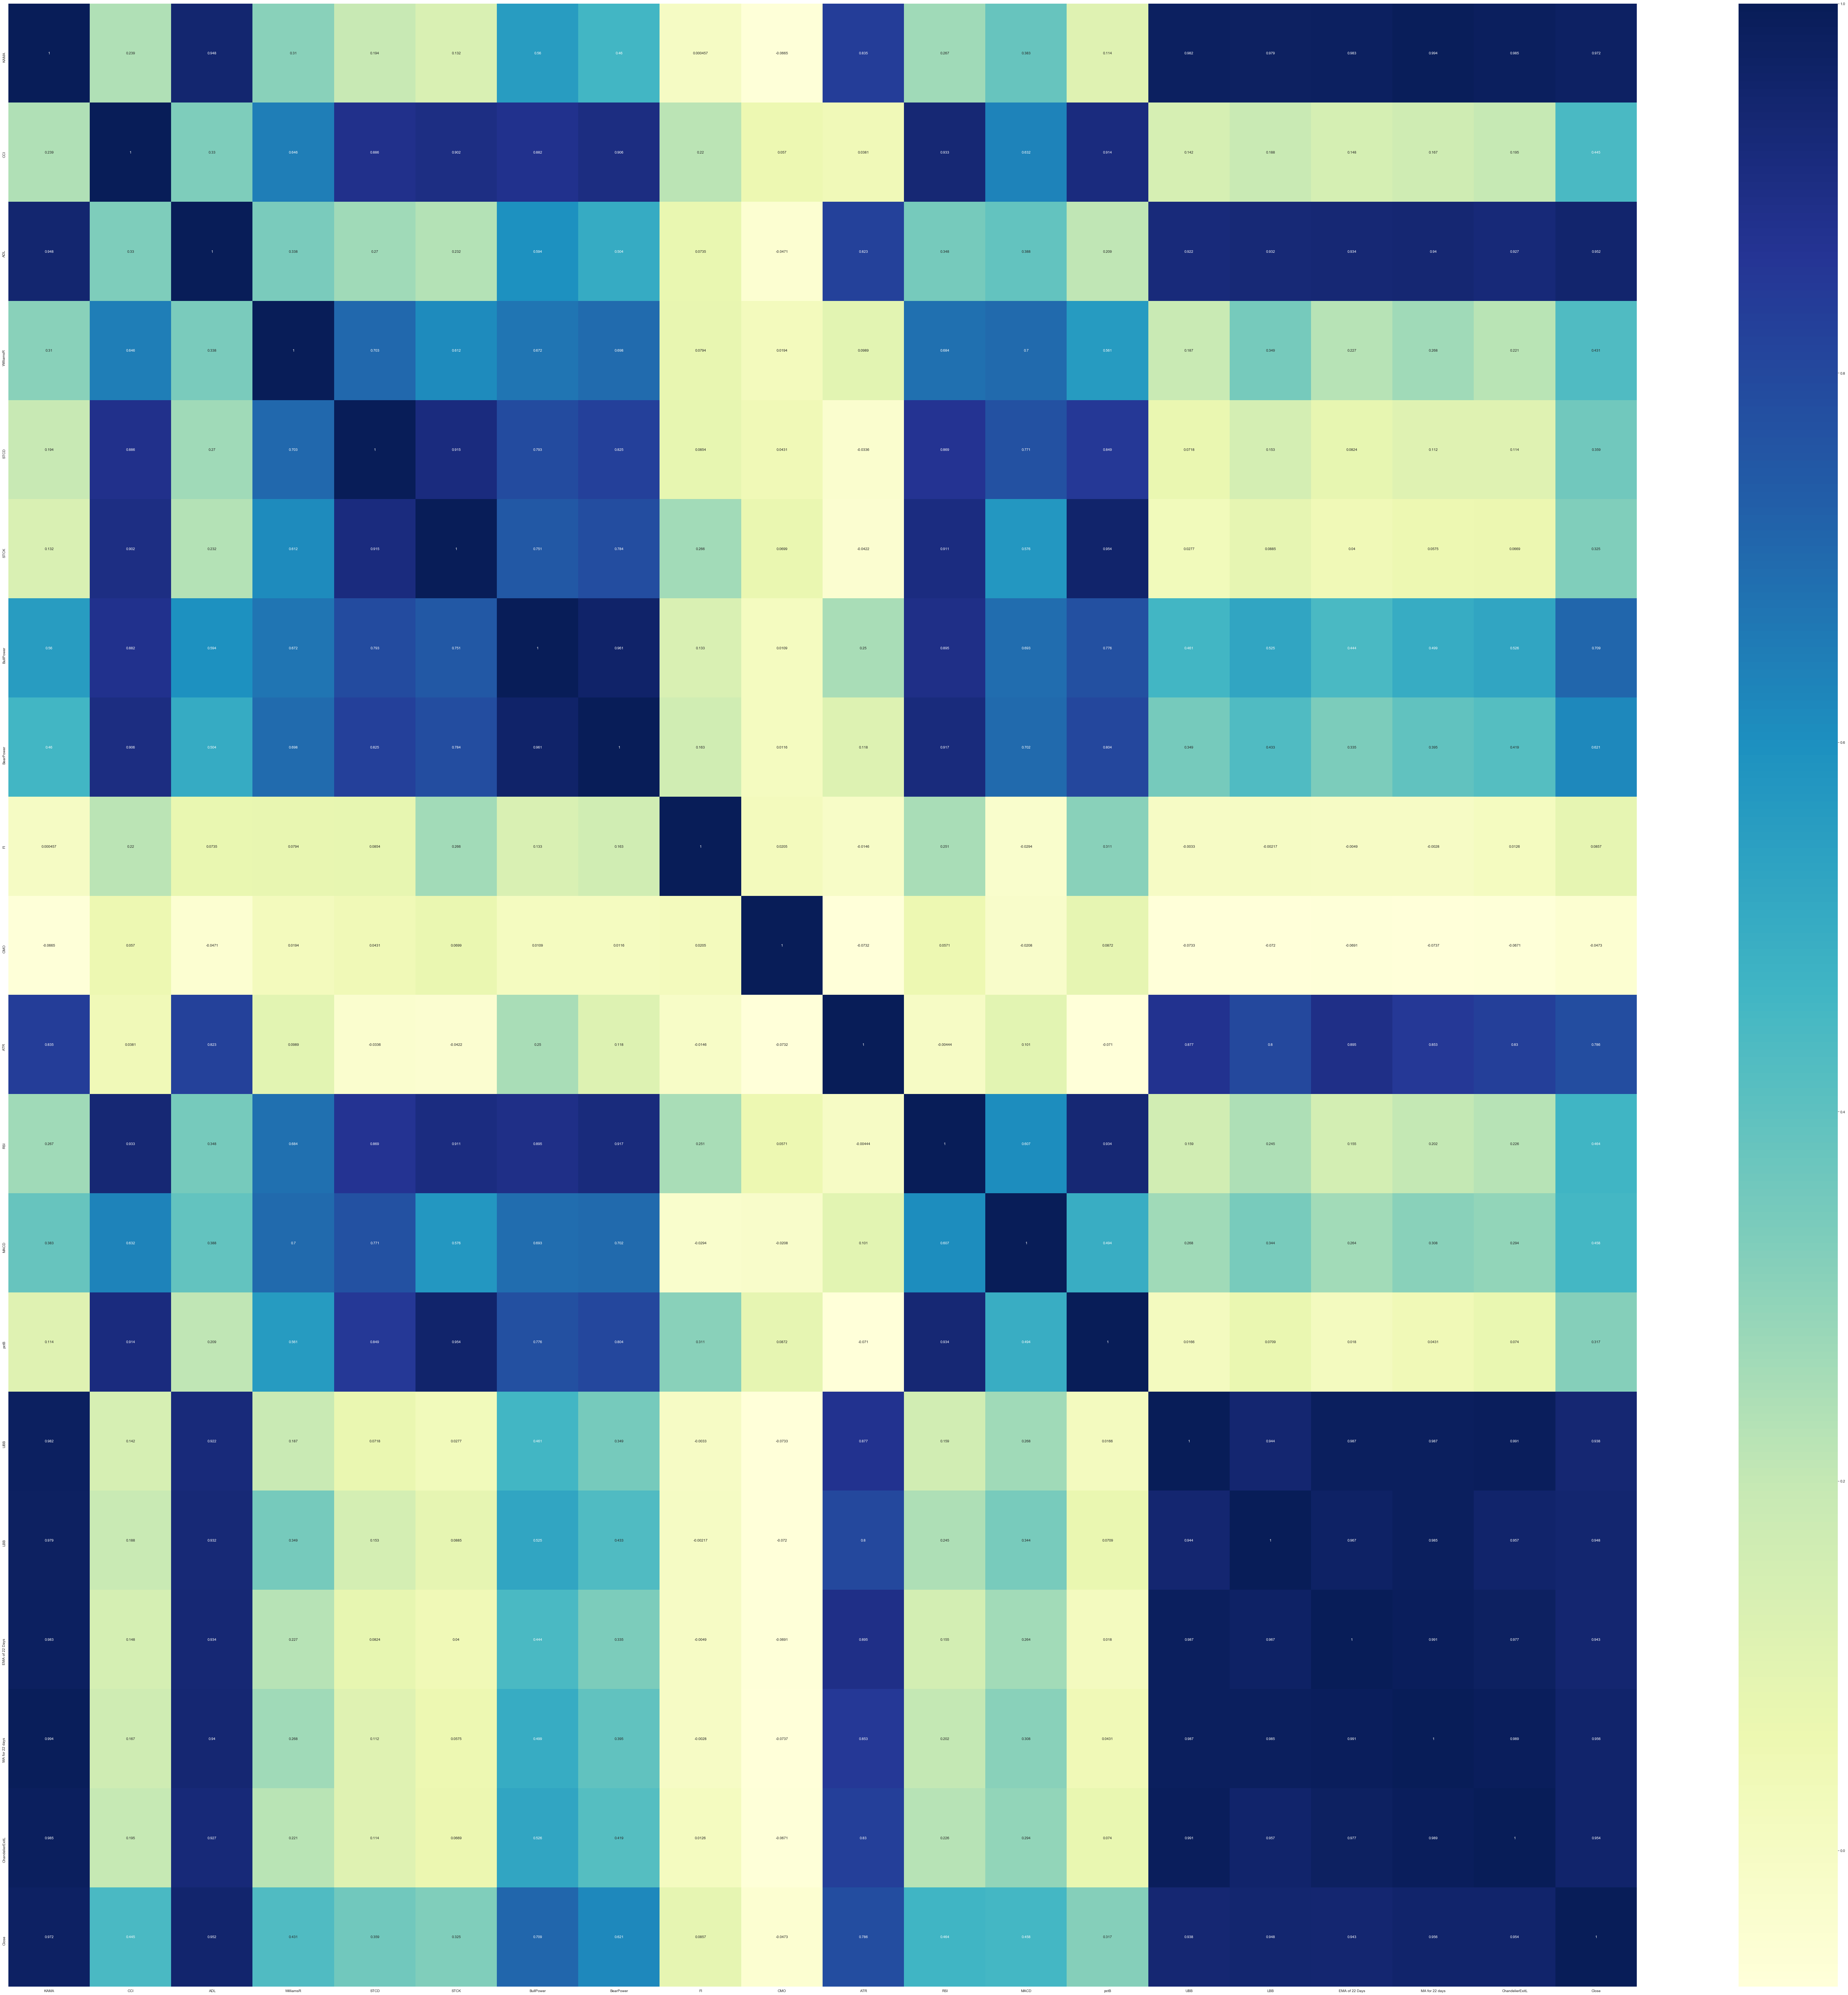

In [29]:
plt.figure(figsize = (100,100))
sns.heatmap(Features.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [30]:
Features.corr()['Close'].sort_values()

CMO               -0.047263
FI                 0.085674
pctB               0.317210
STCK               0.324817
STCD               0.359160
WilliamsR          0.431231
CCI                0.445418
MACD               0.458183
RSI                0.464267
BearPower          0.620968
BullPower          0.709144
ATR                0.785620
UBB                0.937560
EMA of 22 Days     0.942897
LBB                0.948152
ADL                0.951907
ChandelierExitL    0.954456
MA for 22 days     0.956032
KAMA               0.971553
Close              1.000000
Name: Close, dtype: float64

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM